# Data Prep & exploration 


Dataset Description
- **application_{train|test}.csv**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

- **bureau.csv**

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
        For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- **bureau_balance.csv** :         

Monthly balances of previous credits in Credit Bureau.
        This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- **POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
        This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- **credit_card_balance.csv**

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- **previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
        There is one row for each previous application related to loans in our data sample.

- **nstallments_payments.csv**

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
        There is a) one row for every payment that was made plus b) one row each for missed payment.
        One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- **HomeCredit_columns_description.csv**

This file contains descriptions for the columns in the various data files.

<img src="../image.png"><img>

In [39]:
# Auto-reload modules before executing code
# This allows you to edit .py files and see changes without restarting the kernel
%load_ext autoreload
%autoreload 2

print("✅ Auto-reload enabled - your Python files will auto-update!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Auto-reload enabled - your Python files will auto-update!


In [40]:
import sys
import os
from pathlib import Path

# Ajouter le répertoire parent au path
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

# Imports MLFlow
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm

# Imports standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# Configuration MLFlow
mlflow.set_tracking_uri("sqlite:///../mlruns/mlflow.db")
print("✅ MLFlow configuré")


✅ MLFlow configuré


In [41]:
from src.utils.stats import *

## Datasets

 Data description from [Kaggle](https://www.kaggle.com/c/home-credit-default-risk/data) : 


**application_{train|test}.csv**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv**
This file contains descriptions for the columns in the various data files.

on va regarder lezs differents datasets histoire de comprendre ce que chaque fichier contient et notament de former quelques hipothéses

In [42]:
path = "/Users/hamzaboualam/Downloads/OpenClassRoom- projects/P7/src/data/input"
print(os.listdir(path))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


lire toute la donnée

In [43]:
%time
app_train = pd.read_csv(os.path.join(path, 'application_train.csv'))
pos_cash_balance = pd.read_csv(os.path.join(path, 'POS_CASH_balance.csv'))
bureau = pd.read_csv(os.path.join(path, 'bureau.csv'))
bureau_balance = pd.read_csv(os.path.join(path, 'bureau_balance.csv'))
credit_card_balance = pd.read_csv(os.path.join(path, 'credit_card_balance.csv'))
installments_payments = pd.read_csv(os.path.join(path, 'installments_payments.csv'))
previous_application = pd.read_csv(os.path.join(path, 'previous_application.csv'))


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.96 μs


description de toutes les colonnes du dataset

In [44]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
print('description des colonnes du dataset')
description = pd.read_csv(os.path.join(path, 'HomeCredit_columns_description.csv'), encoding="ISO-8859-1")
description

description des colonnes du dataset


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## app train 

In [45]:
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
app_train_stats = get_stats(app_train)

In [47]:
pd.set_option("max_colwidth", 600)
description.loc[description.Table=="application_{train|test}.csv"]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


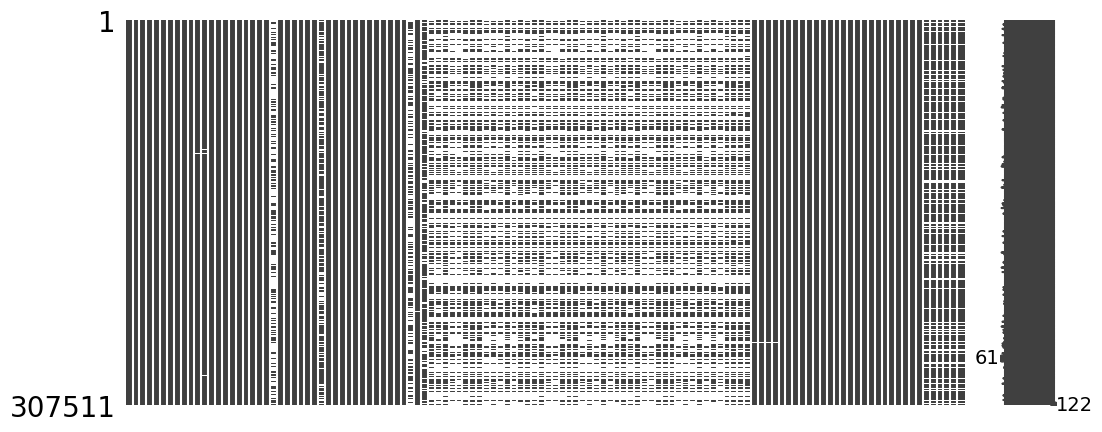

In [48]:
import missingno as msno
msno.matrix(app_train, figsize=(12, 5))
plt.show()


In [49]:
app_train_stats.loc[app_train_stats.feature_name=="TARGET"]

,feature_name,dtypes,nan_percentage,unique_percentage,unique_count,count,mean,std,min,25%,50%,75%,max
1,TARGET,int64,0.0,0.000007,2,307511,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0


In [50]:
app_train_stats.loc[app_train_stats.nan_percentage>0.5]


,feature_name,dtypes,nan_percentage,unique_percentage,unique_count,count,mean,std,min,25%,50%,75%,max
21,OWN_CAR_AGE,float64,0.659908,0.000202,62,104582,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
41,EXT_SOURCE_1,float64,0.563811,0.372618,114584,134133,0.502130,0.211062,0.014568,0.334007,0.505998,0.675053,0.962693
44,APARTMENTS_AVG,float64,0.507497,0.007606,2339,151450,0.117440,0.108240,0.000000,0.057700,0.087600,0.148500,1.000000
45,BASEMENTAREA_AVG,float64,0.585160,0.012292,3780,127568,0.088442,0.082438,0.000000,0.044200,0.076300,0.112200,1.000000
47,YEARS_BUILD_AVG,float64,0.664978,0.000485,149,103023,0.752471,0.113280,0.000000,0.687200,0.755200,0.823200,1.000000
48,COMMONAREA_AVG,float64,0.698723,0.010344,3181,92646,0.044621,0.076036,0.000000,0.007800,0.021100,0.051500,1.000000
49,ELEVATORS_AVG,float64,0.532960,0.000836,257,143620,0.078942,0.134576,0.000000,0.000000,0.000000,0.120000,1.000000
50,ENTRANCES_AVG,float64,0.503488,0.000927,285,152683,0.149725,0.100049,0.000000,0.069000,0.137900,0.206900,1.000000
52,FLOORSMIN_AVG,float64,0.678486,0.000992,305,98869,0.231894,0.161380,0.000000,0.083300,0.208300,0.375000,1.000000
53,LANDAREA_AVG,float64,0.593767,0.011470,3527,124921,0.066333,0.081184,0.000000,0.018700,0.048100,0.085600,1.000000


In [51]:
app_train_stats.loc[app_train_stats.nan_percentage<0.1]

,feature_name,dtypes,nan_percentage,unique_percentage,unique_count,count,mean,std,min,25%,50%,75%,max
0,SK_ID_CURR,int64,0.000000,1.000000,307511,307511,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
1,TARGET,int64,0.000000,0.000007,2,307511,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
2,NAME_CONTRACT_TYPE,object,0.000000,0.000007,2,307511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CODE_GENDER,object,0.000000,0.000010,3,307511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FLAG_OWN_CAR,object,0.000000,0.000007,2,307511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,FLAG_OWN_REALTY,object,0.000000,0.000007,2,307511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CNT_CHILDREN,int64,0.000000,0.000049,15,307511,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
7,AMT_INCOME_TOTAL,float64,0.000000,0.008286,2548,307511,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
8,AMT_CREDIT,float64,0.000000,0.018220,5603,307511,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
9,AMT_ANNUITY,float64,0.000039,0.044460,13672,307499,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05


le fichier de test n'est pas utile puisque il ne contient pas la target donc on va pas pouvoir verifier si le modele créer est interesant ou non 

# EDA

## app train

### la target

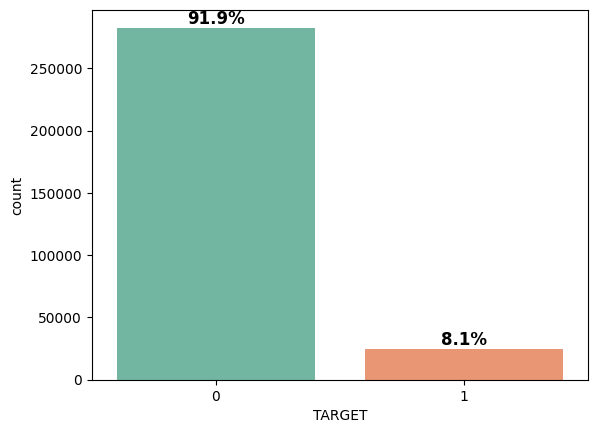

In [52]:
# Target distribution
ax = sns.countplot(x='TARGET', data=app_train, palette='Set2')
total = len(app_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()


on remarque une grange imbalance entre les classes , si qui va causer un probléme pour notre modéle de classification il faut donc regler ça 

### Valeurs Manquantes

commencçons par regarder les colonnes avec plus de 50% de valeurs manquantes

In [53]:
cols_missing = app_train.columns[app_train.isnull().sum() / len(app_train) > 0.59]

# Display missing values for each column
missing_values = app_train[cols_missing].isnull().sum()
missing_values_percentage = missing_values / len(app_train) * 100

missing_values_df = pd.DataFrame({
    'feature_name': cols_missing,
    'missing_values': missing_values,
    'missing_values_percentage': missing_values_percentage
})
missing_values_df.sort_values('missing_values_percentage', ascending=False, inplace=True)
missing_values_df

,feature_name,missing_values,missing_values_percentage
COMMONAREA_AVG,COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,213514,69.432963
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,210199,68.354953


la majortité des colonnes qui conteinet des valeurs manquantes sont des colonnes qui nous donne des informations sur l'habitat . Selon mon experience avec les banques ma hipotése c'est que cela dependra du type de crédit contracté , la majorité des credits (consomation , credit étudiant) ne demande pas ses informations mais si jamais on souhaite un crédit immoblier ils sont obliger d'avoir ses infos . verifons ça ?

In [54]:
app_train.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [55]:
# Afficher les lignes où les personnes n'ont pas de voiture et OWN_CAR_AGE est manquant
app_train[(app_train['FLAG_OWN_CAR'] == 'N') & (app_train['OWN_CAR_AGE'].isnull())]

# Remplacer les OWN_CAR_AGE manquants par 0 uniquement pour ceux qui n'ont pas de voiture
app_train.loc[(app_train['FLAG_OWN_CAR'] == 'N') & (app_train['OWN_CAR_AGE'].isnull()), 'OWN_CAR_AGE'] = 0
app_train.loc[(app_train['FLAG_OWN_CAR'] == 'Y') & (app_train['OWN_CAR_AGE'].isnull()), 'OWN_CAR_AGE'] = app_train['OWN_CAR_AGE'].mean()

In [56]:
# drop all the columns that have more than 59% of missing values
app_train = app_train.drop(cols_missing, axis=1)

In [57]:
cols_missing = app_train.columns[app_train.isnull().sum() / len(app_train) > 0.59]
cols_missing

Index([], dtype='object')

In [58]:
# Sélectionner quelques lignes où les features avec beaucoup de valeurs manquantes ne sont PAS nulles
sample_rows = app_train.dropna()
print(f"Nombre de lignes sans valeurs manquantes dans ces colonnes: {len(sample_rows)}")
sample_rows.head(10)


Nombre de lignes sans valeurs manquantes dans ces colonnes: 33382


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
25,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-19334,-3494,-2419.0,-2893,1,1,0,1,1,0,Cleaning staff,2.0,2,2,SATURDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.561948,0.651406,0.461482,0.0722,0.0147,0.9781,0.00,0.1379,0.1667,0.0670,0.0000,0.0735,0.0153,0.9782,0.0000,0.1379,0.1667,0.0698,0.0000,0.0729,0.0147,0.9781,0.00,0.1379,0.1667,0.0682,0.0000,block of flats,0.0533,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
50,100058,0,Revolving loans,F,N,Y,0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,-12406,-1176,-1149.0,-2576,1,1,0,0,0,0,Core staff,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,School,0.656225,0.450850,0.479449,0.0664,0.0442,0.9980,0.08,0.0552,0.4083,0.0651,0.0160,0.0441,0.0306,0.9980,0.0806,0.0690,0.3750,0.0487,0.0168,0.0822,0.0408,0.9980,0.08,0.0690,0.3750,0.0747,0.0163,block of flats,0.0403,Panel,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.026392,-18632,-6977,-3904.0,-1937,1,1,0,1,1,0,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,0,0,Services,0.311510,0.713355,0.309275,0.5309,0.2491,0.9811,0.88,0.3793,0.4583,0.5878,0.0487,0.5410,0.2585,0.9811,0.8862,0.3793,0.4583,0.6124,0.0516,0.5361,0.2491,0.9811,0.88,0.3793,0.4583,0.5983,0.0498,block of flats

In [59]:
sample_rows.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         29774
Revolving loans     3608
Name: count, dtype: int64

In [60]:
print(sample_rows.AMT_CREDIT.min())
print(sample_rows.AMT_CREDIT.max())


45000.0
4050000.0


In [61]:
print(sample_rows.AMT_CREDIT.value_counts())


AMT_CREDIT
450000.0     1170
675000.0      963
270000.0      925
225000.0      902
900000.0      867
             ... 
1224000.0       1
2466954.0       1
1535715.0       1
106794.0        1
711454.5        1
Name: count, Length: 3108, dtype: int64


In [62]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

### Valeurs abberantes

NUMERIC cOLS

In [63]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,153161.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.078942,0.149725,0.226282,0.107399,0.028358,0.114231,0.087543,0.977065,0.074490,0.145193,0.222315,0.105975,0.027022,0.117850,0.087955,0.977752,0.078078,0.149213,0.225897,0.108607,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.134576,0.100049

variables avec notions de temps commencent par DAYS_

In [64]:
# we are going to split the columns  of our data frame into differents types : 
# 1. variables avec notions de temps commencent par DAYS_
# 2. variables avec notions de fréquence commencent par CNT_
# 3. variables avec notions de montant commencent par AMT_
# 4. variables avec notions de fréquence commencent par FLAG_

DAYS_BIRTH: Client's age in days at the time of application	time only relative to the application

In [65]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

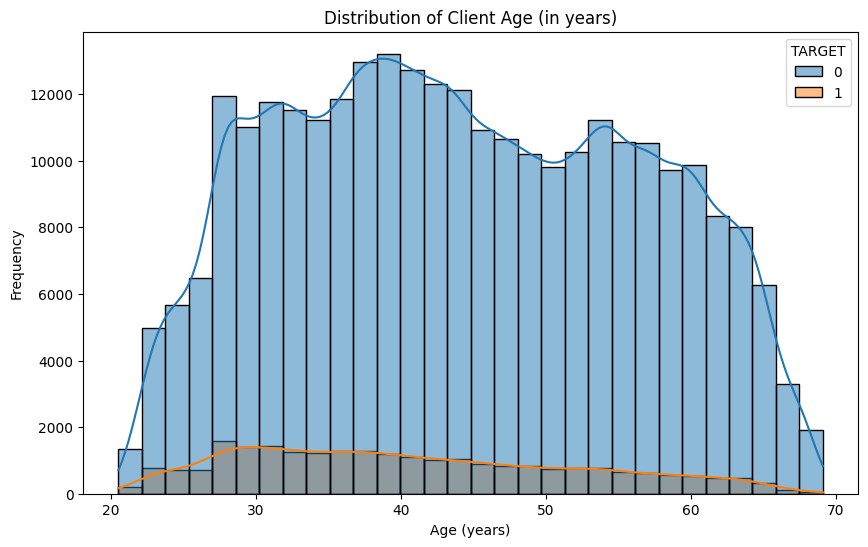

In [66]:
# Convert DAYS_BIRTH to age in years
age_years = app_train['DAYS_BIRTH'] / (-365)

# Create a DataFrame for plotting
age_df = pd.DataFrame({
    'Age': age_years,
    'TARGET': app_train['TARGET']
})

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=age_df, x='Age', bins=30, kde=True, hue='TARGET')
plt.title('Distribution of Client Age (in years)')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


In [67]:
age_years.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

DAYS_EMPLOYED : How many days before the application the person started current employment	time only relative to the application

In [68]:
(app_train['DAYS_EMPLOYED']// (- 365.25)).describe()

count    307511.000000
mean       -175.125813
std         386.609084
min       -1000.000000
25%           0.000000
50%           3.000000
75%           7.000000
max          49.000000
Name: DAYS_EMPLOYED, dtype: float64

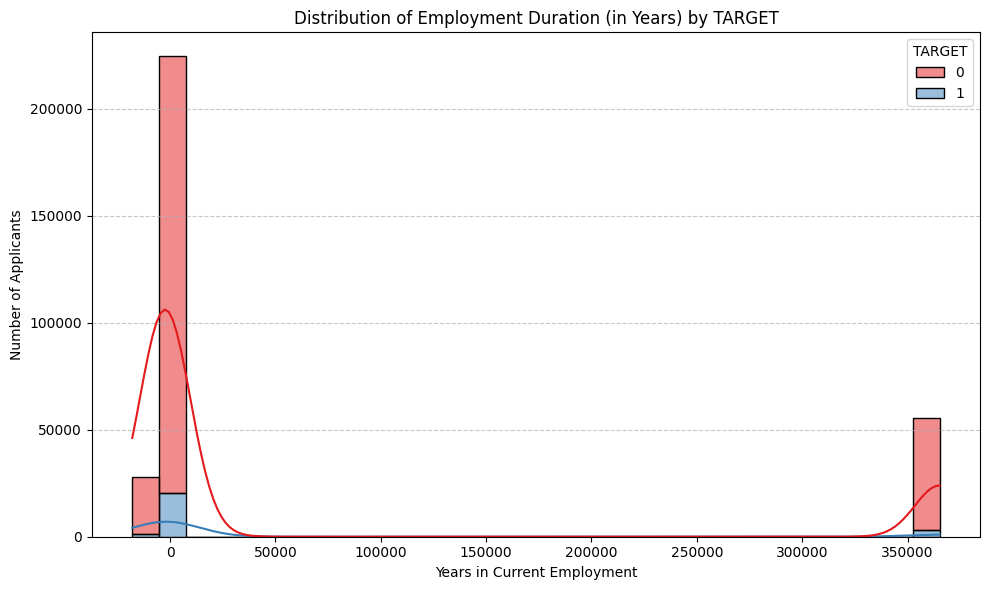

In [69]:
# Plot employment duration in years, separated by TARGET
years_employed = app_train['DAYS_EMPLOYED'] 
emp_df = pd.DataFrame({
    'YearsEmployed': years_employed,
    'TARGET': app_train['TARGET']
})

plt.figure(figsize=(10, 6))
sns.histplot(data=emp_df, x='YearsEmployed', bins=30, hue='TARGET', kde=True, palette='Set1', multiple="stack")
plt.title('Distribution of Employment Duration (in Years) by TARGET')
plt.xlabel('Years in Current Employment')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [70]:
Q1 = app_train['DAYS_EMPLOYED'].quantile(0.25)
Q3 = app_train['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = app_train[(app_train['DAYS_EMPLOYED'] < lower_bound) | (app_train['DAYS_EMPLOYED'] > upper_bound)]
print(f"Number of outliers in DAYS_EMPLOYED: {outliers.shape[0]}")

# Optionally, display a few outlier rows
outliers[['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']].head()


Number of outliers in DAYS_EMPLOYED: 72217


,SK_ID_CURR,DAYS_EMPLOYED,TARGET
8,100011,365243,0
11,100015,365243,0
18,100022,-7804,0
23,100027,365243,0
38,100045,365243,0


In Home Credit data, a value of 365243 in DAYS_EMPLOYED indicates people who are retired/unemployed (it's a "magic" value).

In [71]:
magic_val = 365243
magic_count = (app_train['DAYS_EMPLOYED'] == magic_val).sum()
print(f"Rows with DAYS_EMPLOYED == {magic_val}: {magic_count}")
print(f"Percentage: {magic_count / len(app_train) * 100:.2f}%")

Rows with DAYS_EMPLOYED == 365243: 55374
Percentage: 18.01%


In [72]:
app_train[app_train['DAYS_EMPLOYED'] > 0].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

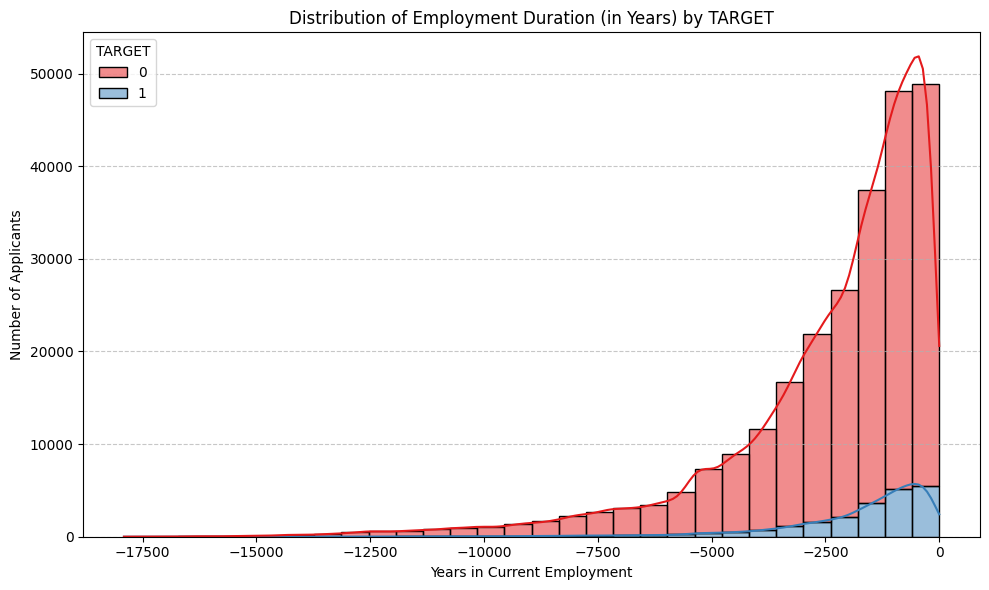

In [73]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(magic_val, np.nan)
years_employed = app_train['DAYS_EMPLOYED'] 
emp_df = pd.DataFrame({
    'YearsEmployed': years_employed,
    'TARGET': app_train['TARGET']
})

plt.figure(figsize=(10, 6))
sns.histplot(data=emp_df, x='YearsEmployed', bins=30, hue='TARGET', kde=True, palette='Set1', multiple="stack")
plt.title('Distribution of Employment Duration (in Years) by TARGET')
plt.xlabel('Years in Current Employment')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [74]:
potential_outlier_columns = [
    'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'CNT_CHILDREN'
]

for col in potential_outlier_columns:
    print(f"\nDistribution statistique de {col}:")
    print(app_train[col].describe())
    plt.figure(figsize=(10, 4))
    sns.histplot(app_train[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Exemple d'identification de valeurs aberrantes pour CNT_CHILDREN
outliers_children = app_train[app_train['CNT_CHILDREN'] > 5]
print(f"Lignes avec > 5 enfants:\n{outliers_children[['SK_ID_CURR', 'CNT_CHILDREN', 'TARGET']]}")

# Pour les variables monétaires, majorons visuellement les queues de distribution
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=app_train[col])
    plt.title(f'Boxplot de {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# On pourrait également explorer les "âges" de voiture pour détecter des valeurs qui dépassent 80 ans, par exemple
if 'OWN_CAR_AGE' in app_train.columns:
    print("\nValeurs élevées pour OWN_CAR_AGE (> 70 ans):")
    print(app_train[app_train['OWN_CAR_AGE'] > 70][['SK_ID_CURR', 'OWN_CAR_AGE']])



Distribution statistique de OWN_CAR_AGE:


KeyError: 'OWN_CAR_AGE'

Première exploration des valeurs aberrantes terminée.
Passage à l'analyse univariée des variables principales.

Remarques sur les variables analysées :
- OWN_CAR_AGE : Beaucoup de valeurs manquantes, distribution concentrée sous 30 ans, valeurs extrêmes au-delà de 70 ans qu'il faudra probablement traiter ou exclure.
- AMT_INCOME_TOTAL : Large gamme de valeurs, avec une forte concentration sous 200 000. Quelques montants extrêmement élevés qui semblent peu plausibles (valeurs à vérifier ou filtrer).
- AMT_CREDIT/AMT_GOODS_PRICE/AMT_ANNUITY : Montants élevés cohérents avec des prêts immobiliers, mais là aussi, la distribution est très étendue; attention aux valeurs hors norme ou incohérentes.
- CNT_CHILDREN : Majorité des clients ont peu ou pas d’enfants. Quelques dossiers affichent des nombres très élevés d’enfants (>10) qui pourraient être des erreurs de saisie ou des cas particuliers.

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Analyse des variables clés

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_variable_distribution(df, var, bins=30, kde=True):
    """
    Trace la distribution d'une variable quantitative.
    """
    plt.figure(figsize=(10,4))
    sns.histplot(df[var].dropna(), bins=bins, kde=kde, color='royalblue')
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Nombre d'observations")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_variable_vs_target(df, var, target='TARGET', bins=30):
    """
    Trace la distribution d'une variable quantitative selon les valeurs de la cible (target).
    Affiche les histogrammes par classe de la cible.
    """
    plt.figure(figsize=(10,5))
    for value in sorted(df[target].dropna().unique()):
        subset = df[df[target]==value]
        sns.histplot(subset[var].dropna(), bins=bins, kde=False,
                     label=f"{target}={value}", alpha=0.6)
    plt.title(f"Distribution de {var} selon {target}")
    plt.xlabel(var)
    plt.ylabel("Nombre d'observations")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


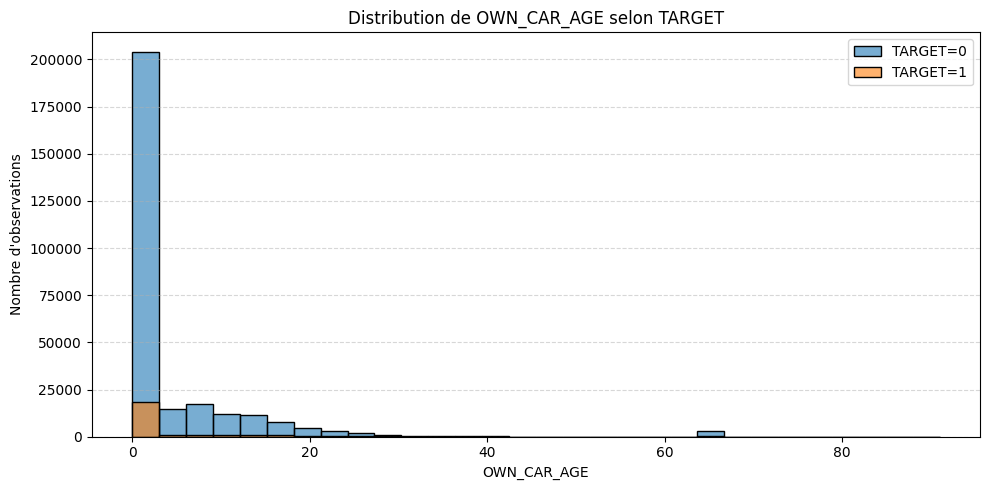

In [ ]:
plot_variable_vs_target(app_train, 'OWN_CAR_AGE')

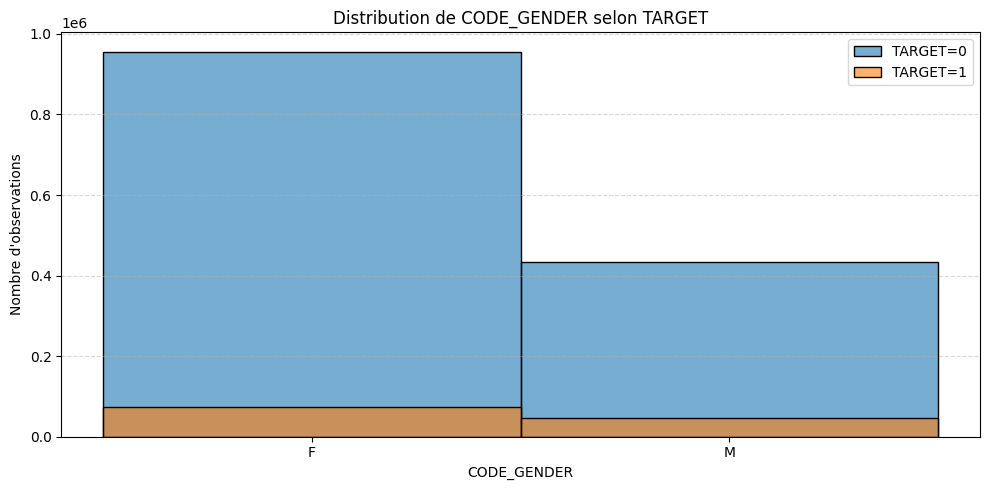

In [ ]:
plot_variable_vs_target(app_train, 'CODE_GENDER')

In [ ]:
app_train = app_train[app_train['CODE_GENDER'] != 'XNA']

In [ ]:
def plot_stat(data, feature, title, target='TARGET'):
    """
    Visualise the distribution of a categorical feature, 
    with hue to differentiate the target variable (default vs non-default).
    Clean plot with improved labels and legend.
    """
    # Set up default labels depending on target values to clarify "default" vs "not default"
    target_map = {0: "No Default (0)", 1: "Default (1)"}
    # Use value_counts to get sorted order for y-axis
    order = data[feature].value_counts(ascending=False).index

    # Ensure consistent color palette
    palette = {
        0: "#76bc21",   # greenish for No Default
        1: "#e63946",   # red for Default
    }
    # If the target variable has values other than just 0 and 1
    unique_targets = sorted(data[target].dropna().unique())
    used_palette = [palette.get(val, None) for val in unique_targets]
    if any(c is None for c in used_palette):
        # fallback to pastel if any color missing
        used_palette = "pastel"

    fig, ax = plt.subplots(figsize=(14, 7))
    barplot = sns.countplot(
        y=feature,
        data=data,
        order=order,
        hue=target,
        palette=used_palette
    )

    # Improve title and axis labels
    ax.set_title(title, fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel("Number of Clients", fontsize=16)
    ax.set_ylabel(feature.replace('_', ' ').title(), fontsize=16)

    # Set legend with clearer class labels
    handles, labels = ax.get_legend_handles_labels()
    label_map = [target_map.get(int(l), l) for l in labels]
    ax.legend(handles, label_map, title="Client Status", fontsize=13, title_fontsize=15, loc='best')

    # Add % text to bars (per full data, not per bar group)
    total = len(data)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        y = p.get_y() + height / 2
        x = p.get_x() + width
        if width > 0:  # avoid text at zero
            percentage = f"{100 * width / total:.4f}%"
            ax.annotate(percentage, (x + 3, y), fontsize=13, fontweight='bold', va='center')

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

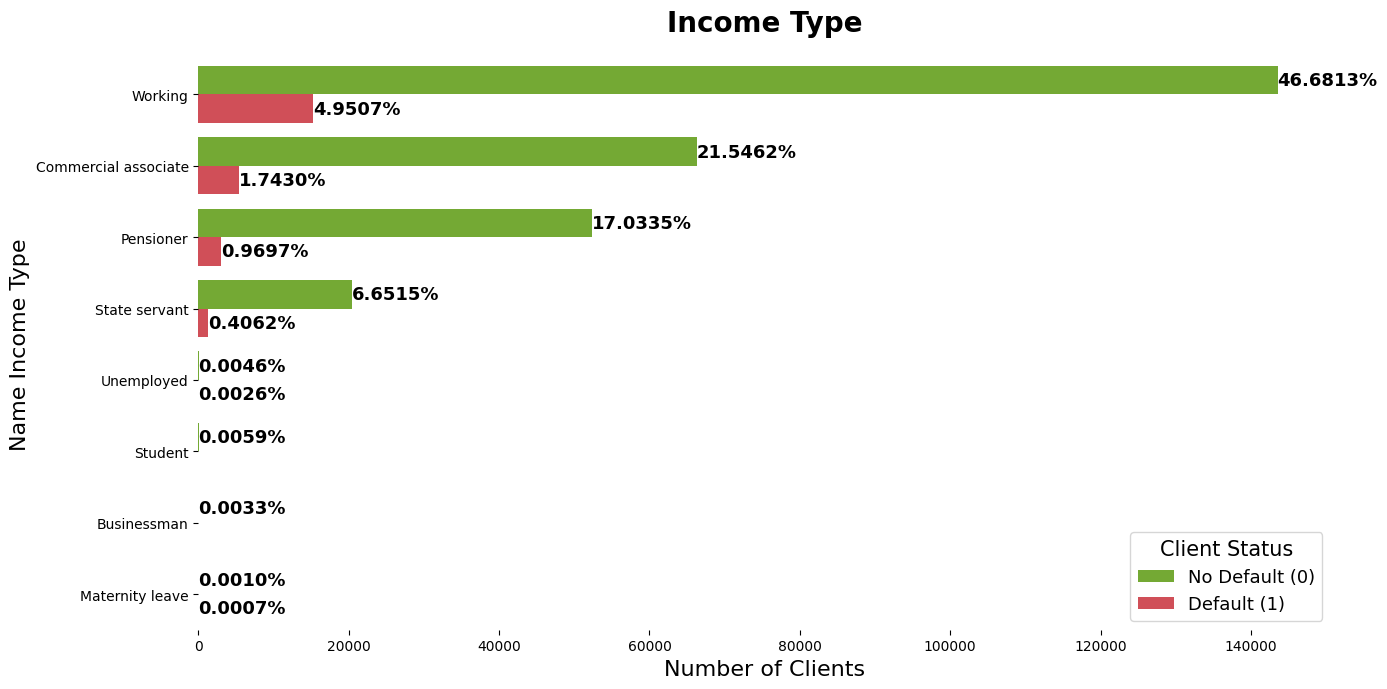

In [ ]:
plot_stat(app_train, 'NAME_INCOME_TYPE', 'Income Type')

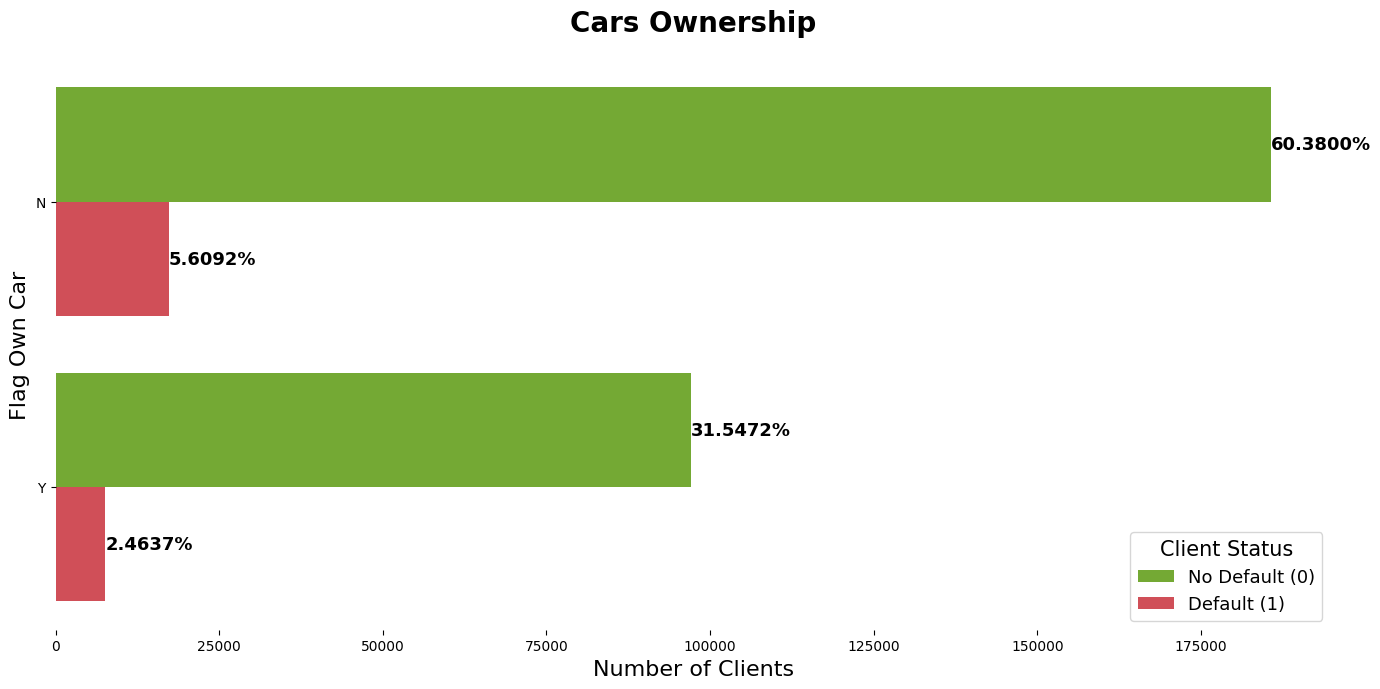

In [ ]:
plot_stat(app_train, 'FLAG_OWN_CAR', 'Cars Ownership')

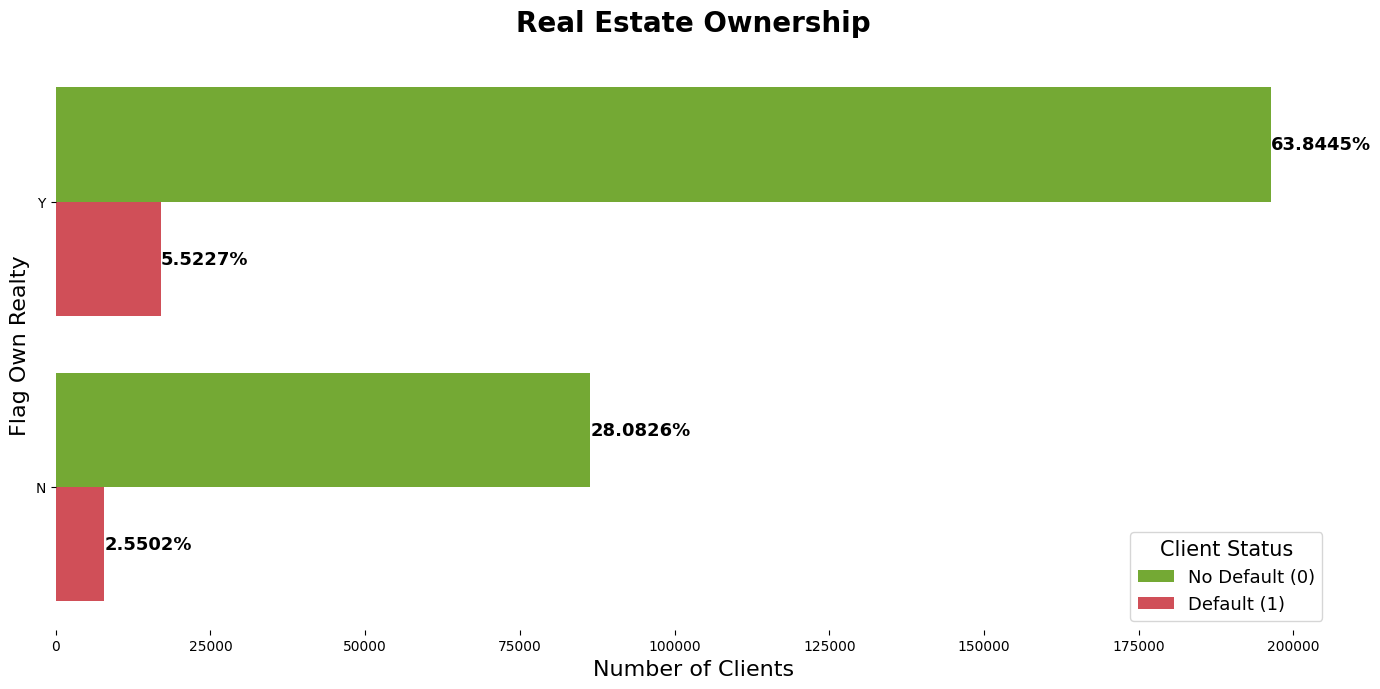

In [ ]:
plot_stat(app_train, 'FLAG_OWN_REALTY', 'Real Estate Ownership')

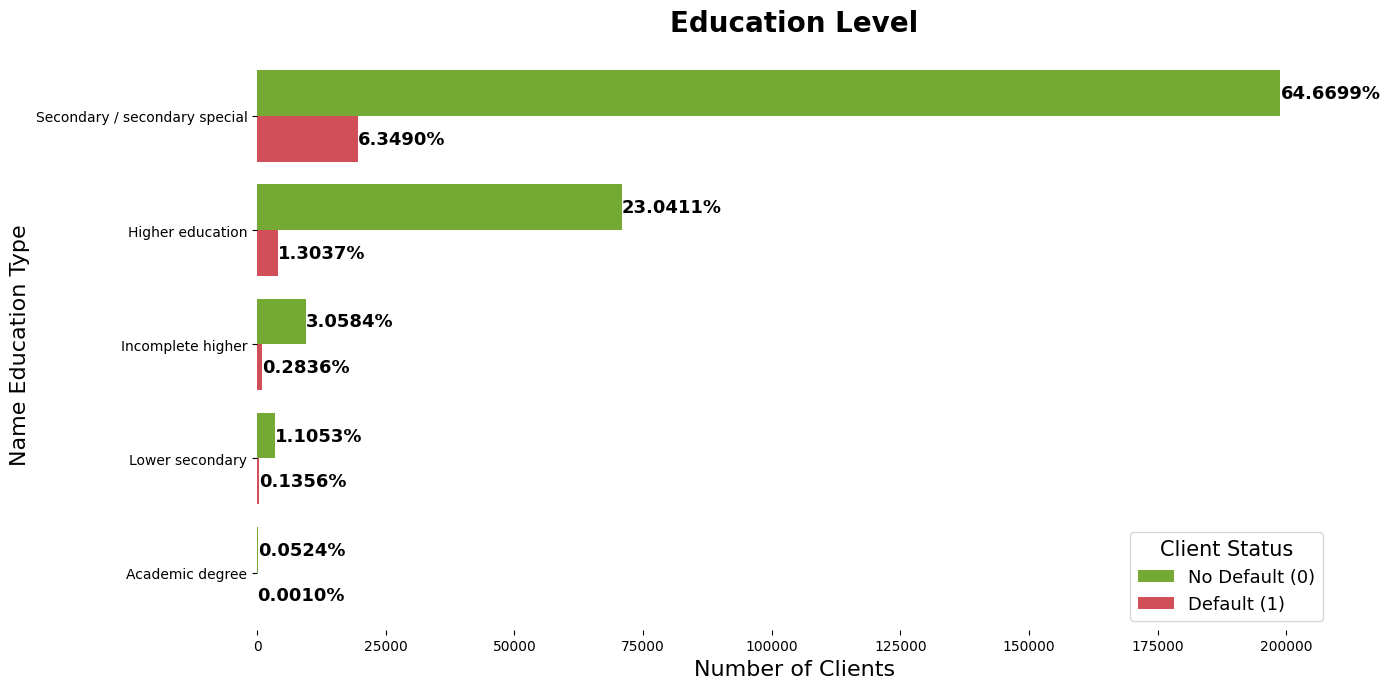

In [ ]:
plot_stat(app_train, 'NAME_EDUCATION_TYPE', 'Education Level')

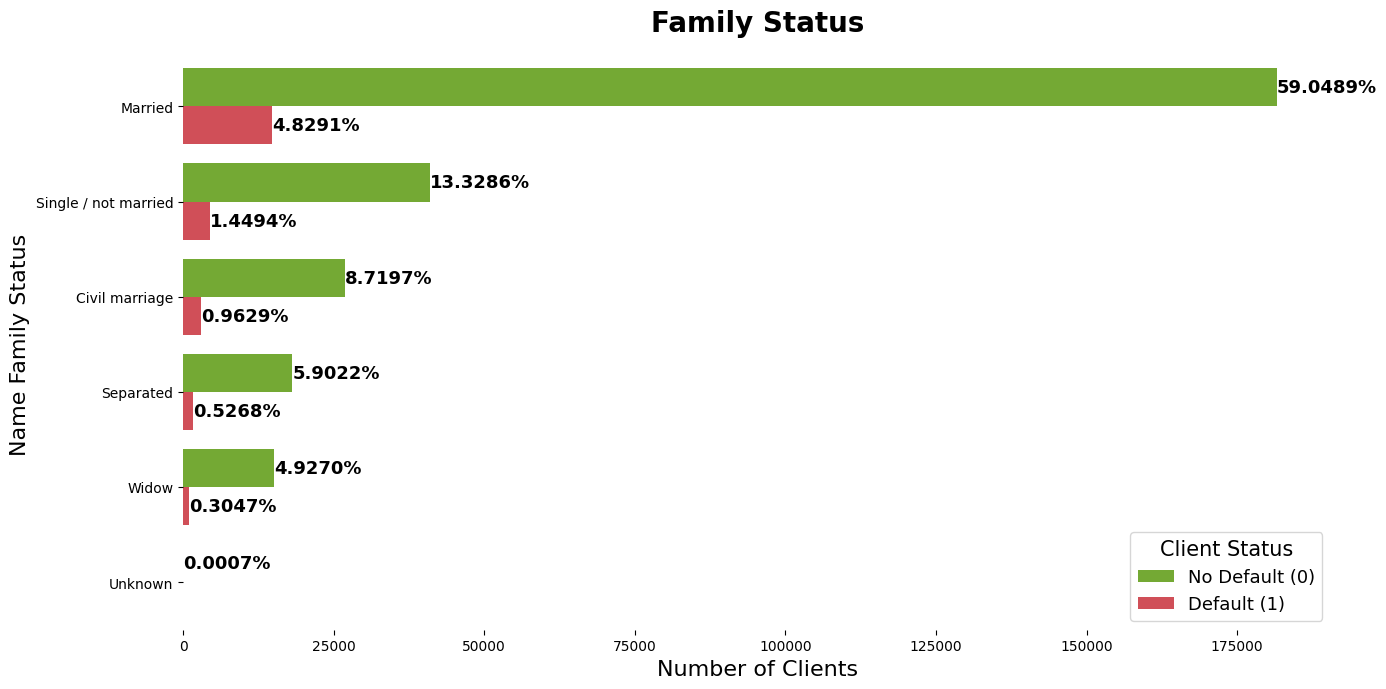

In [ ]:
plot_stat(app_train, 'NAME_FAMILY_STATUS', 'Family Status')

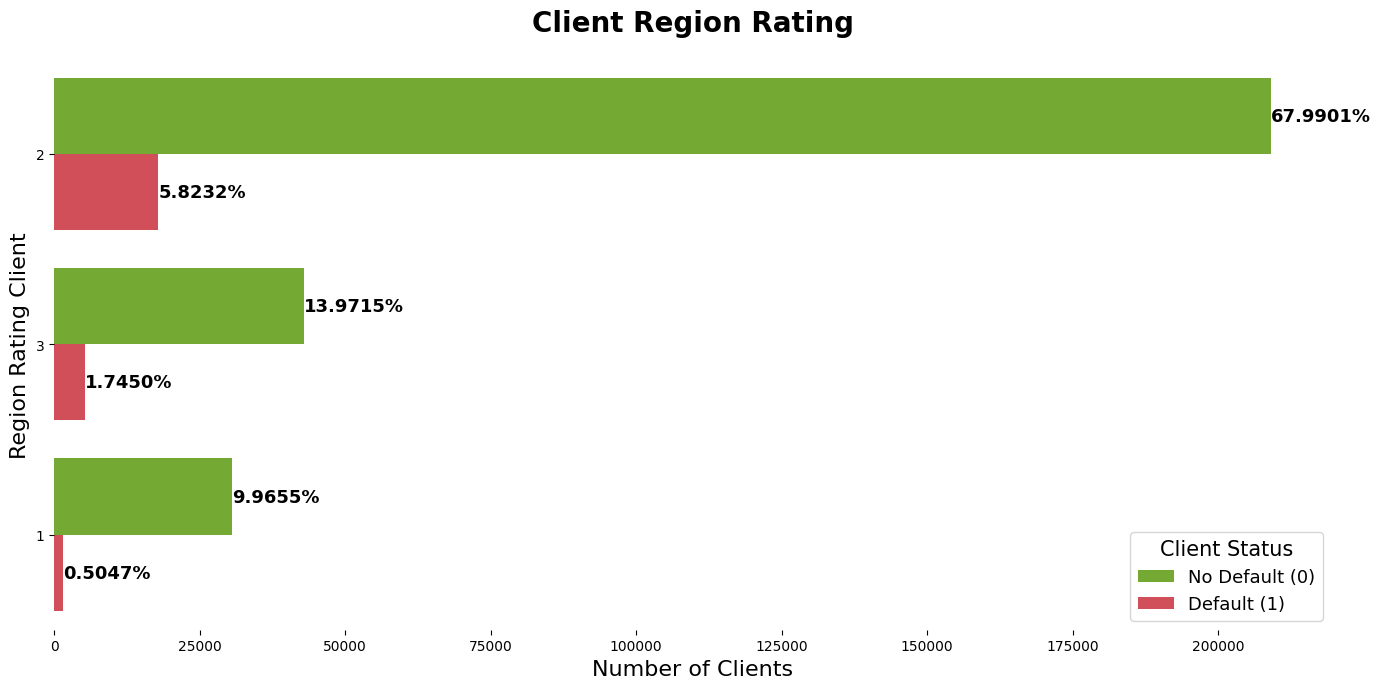

In [ ]:
plot_stat(app_train, 'REGION_RATING_CLIENT', 'Client Region Rating')

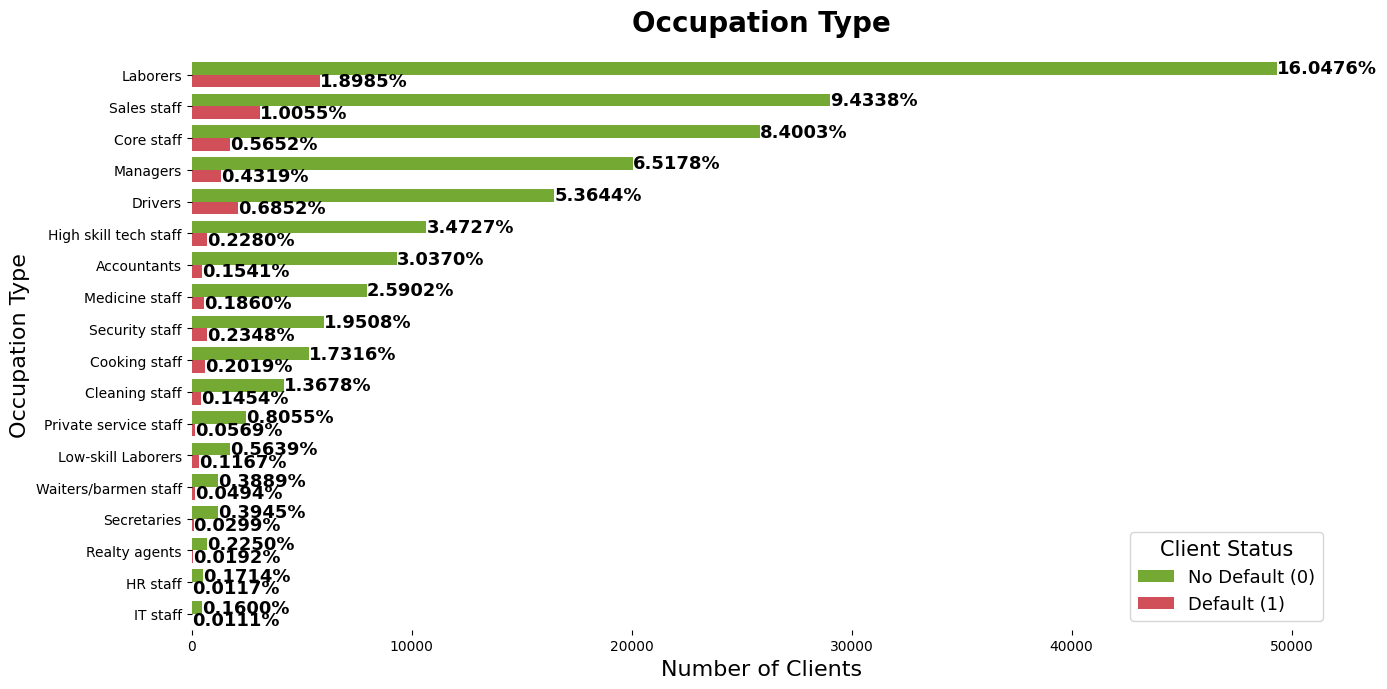

In [ ]:
plot_stat(app_train, 'OCCUPATION_TYPE', 'Occupation Type')

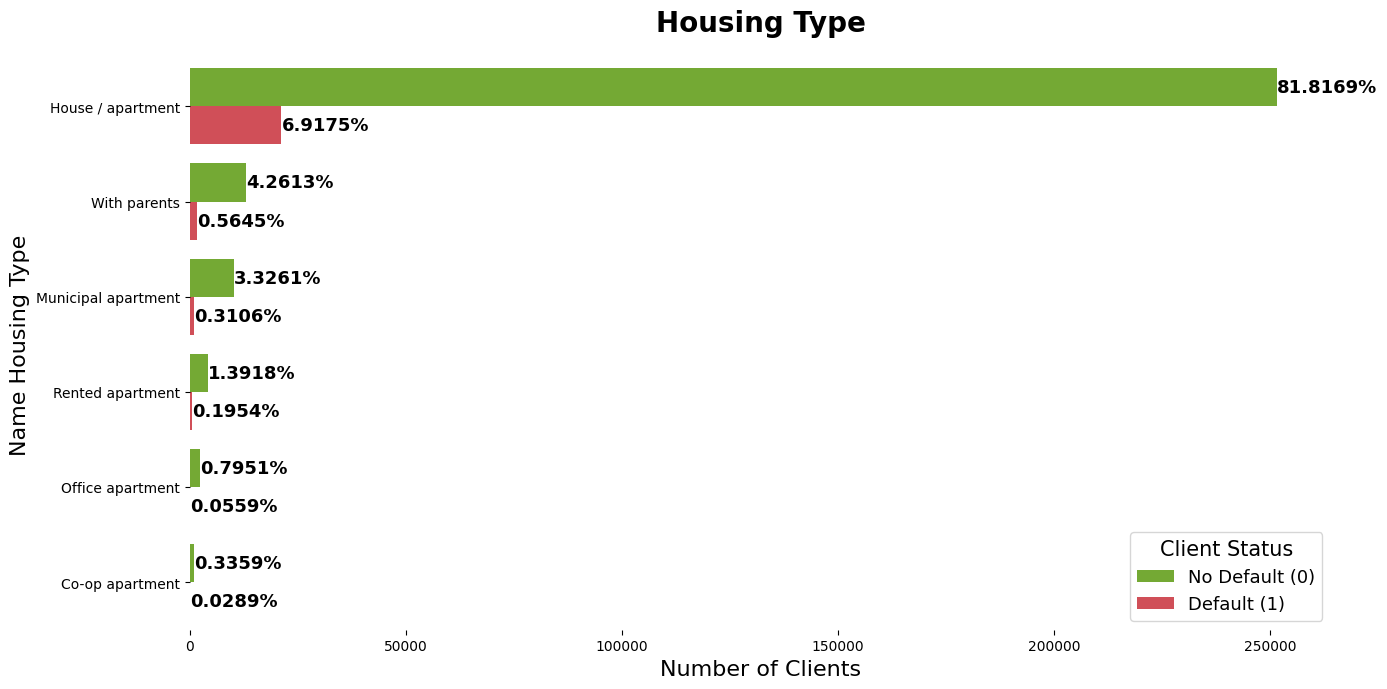

In [ ]:
plot_stat(app_train, 'NAME_HOUSING_TYPE', 'Housing Type')

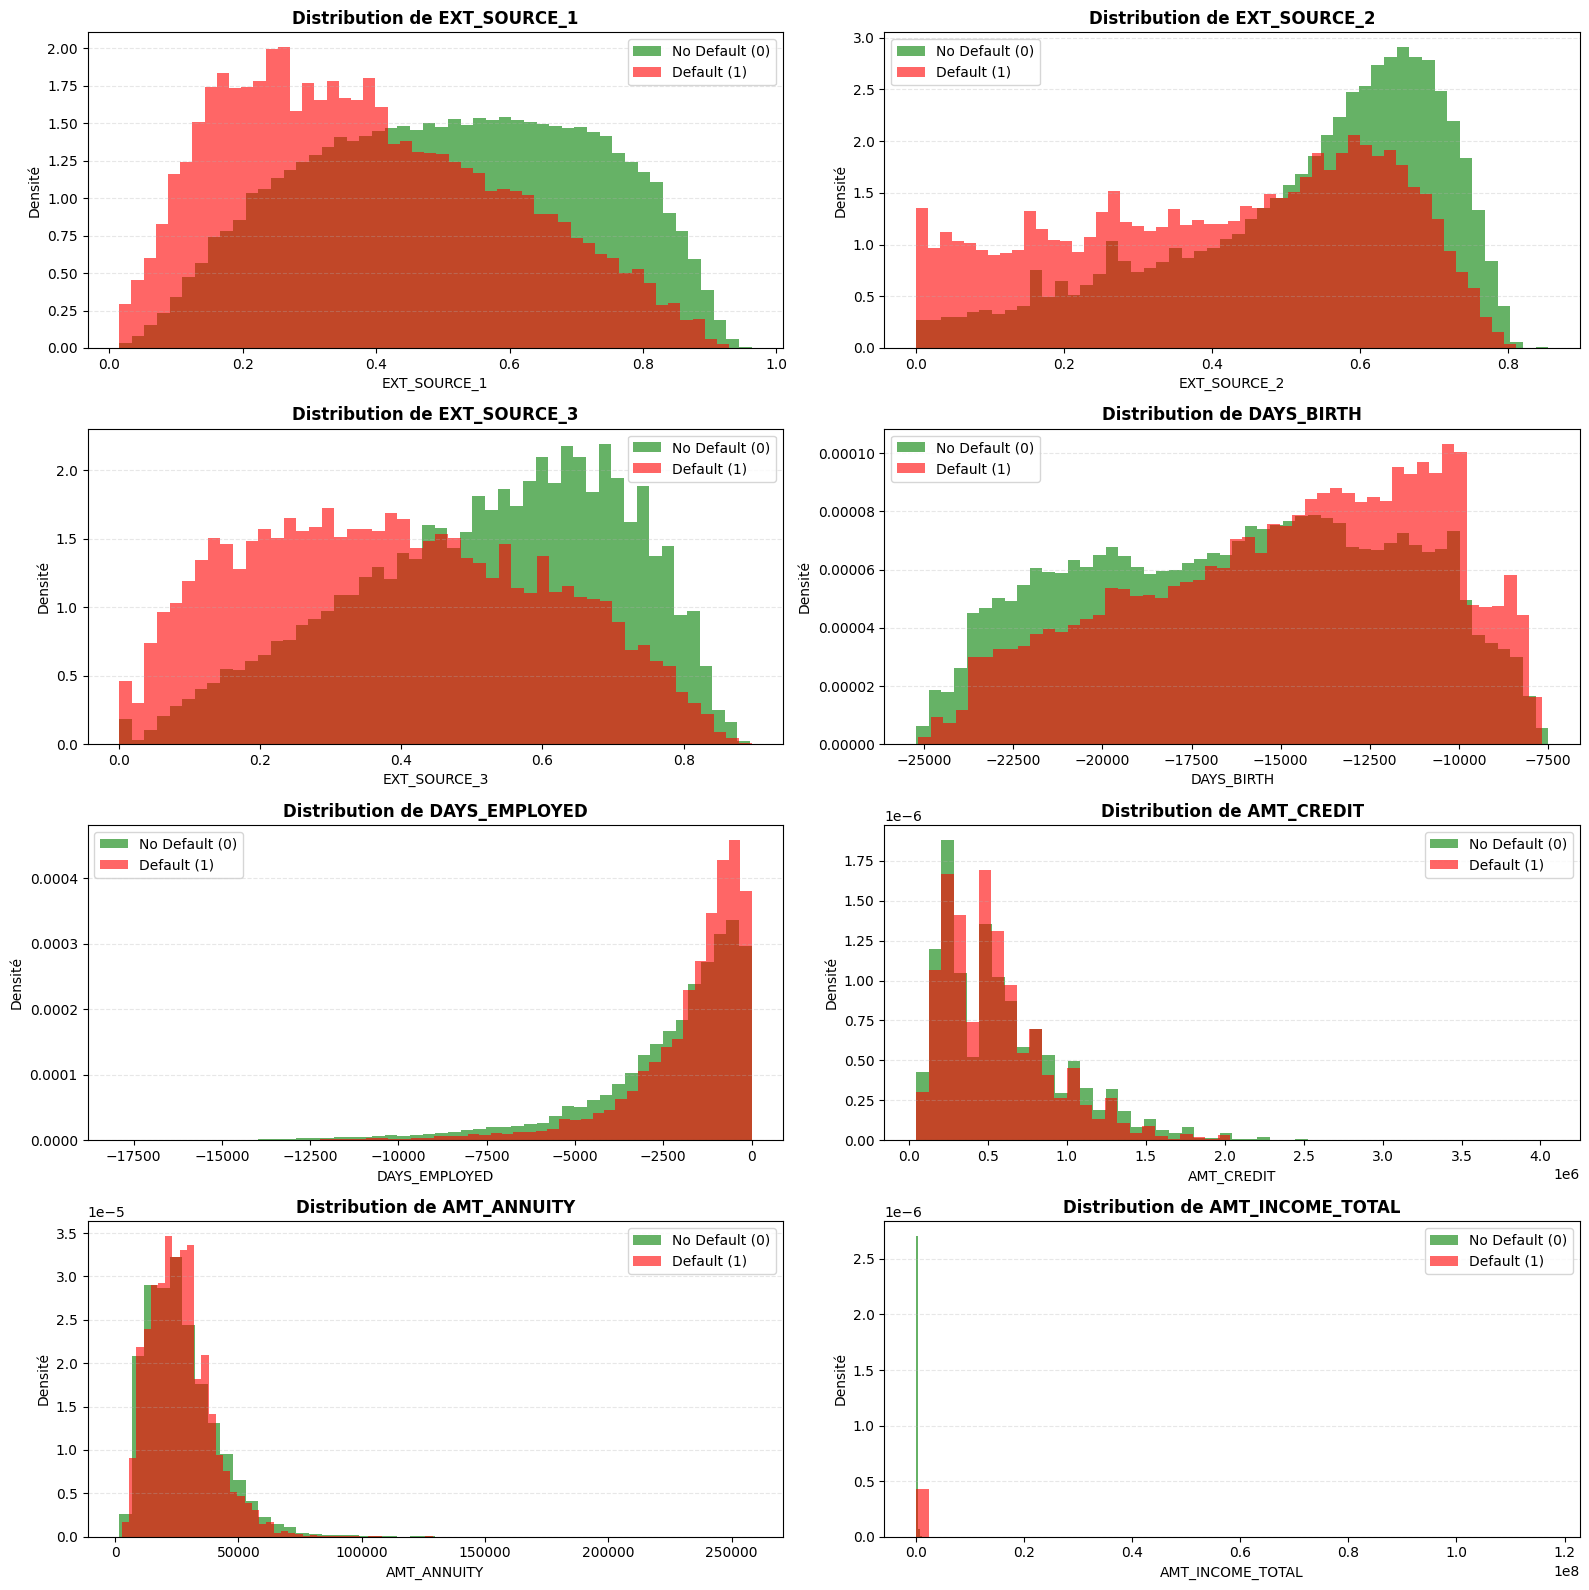


STATISTIQUES COMPARATIVES - Clients défaillants vs non-défaillants

EXT_SOURCE_1:
------------------------------------------------------------
            mean    median       std
TARGET                              
0       0.511461  0.517452  0.208804
1       0.386968  0.361675  0.204729
Différence moyenne: -24.34%

EXT_SOURCE_2:
------------------------------------------------------------
            mean    median       std
TARGET                              
0       0.523479  0.573905  0.186277
1       0.410935  0.440381  0.213107
Différence moyenne: -21.50%

EXT_SOURCE_3:
------------------------------------------------------------
            mean    median       std
TARGET                              
0       0.520969  0.546023  0.190465
1       0.390717  0.379100  0.205810
Différence moyenne: -25.00%

DAYS_BIRTH:
------------------------------------------------------------
                mean   median          std
TARGET                                    
0      -16138.17

In [ ]:
# Analyse comparative des variables clés entre clients défaillants et non-défaillants

# Variables à analyser (celles qui montrent le plus de différence)
key_variables = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 
                 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']

# Créer des sous-graphiques pour comparer les distributions
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.ravel()

for idx, var in enumerate(key_variables):
    if var in app_train.columns:
        # Séparer les données par TARGET
        data_0 = app_train[app_train['TARGET'] == 0][var].dropna()
        data_1 = app_train[app_train['TARGET'] == 1][var].dropna()
        
        # Tracer les distributions
        axes[idx].hist(data_0, bins=50, alpha=0.6, label='No Default (0)', 
                      color='green', density=True)
        axes[idx].hist(data_1, bins=50, alpha=0.6, label='Default (1)', 
                      color='red', density=True)
        
        axes[idx].set_title(f'Distribution de {var}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Densité')
        axes[idx].legend()
        axes[idx].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n" + "="*80)
print("STATISTIQUES COMPARATIVES - Clients défaillants vs non-défaillants")
print("="*80)

for var in key_variables:
    if var in app_train.columns:
        print(f"\n{var}:")
        print("-" * 60)
        stats_by_target = app_train.groupby('TARGET')[var].agg(['mean', 'median', 'std'])
        print(stats_by_target)
        
        # Calculer la différence relative
        if stats_by_target.loc[0, 'mean'] != 0:
            diff_pct = ((stats_by_target.loc[1, 'mean'] - stats_by_target.loc[0, 'mean']) 
                       / abs(stats_by_target.loc[0, 'mean']) * 100)
            print(f"Différence moyenne: {diff_pct:.2f}%")


## Analyse Multivarié

### Analyse des correlations


In [ ]:
numeric_cols = app_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('SK_ID_CURR')

corr_with_target = app_train[numeric_cols].corrwith(app_train['TARGET']).sort_values(ascending=False)
print("Top 10 correlations positives avec TARGET:")
print(corr_with_target.head(10))
print("\nTop 10 correlations negatives avec TARGET:")
print(corr_with_target.tail(10))


Top 10 correlations positives avec TARGET:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
dtype: float64

Top 10 correlations negatives avec TARGET:
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
dtype: float64


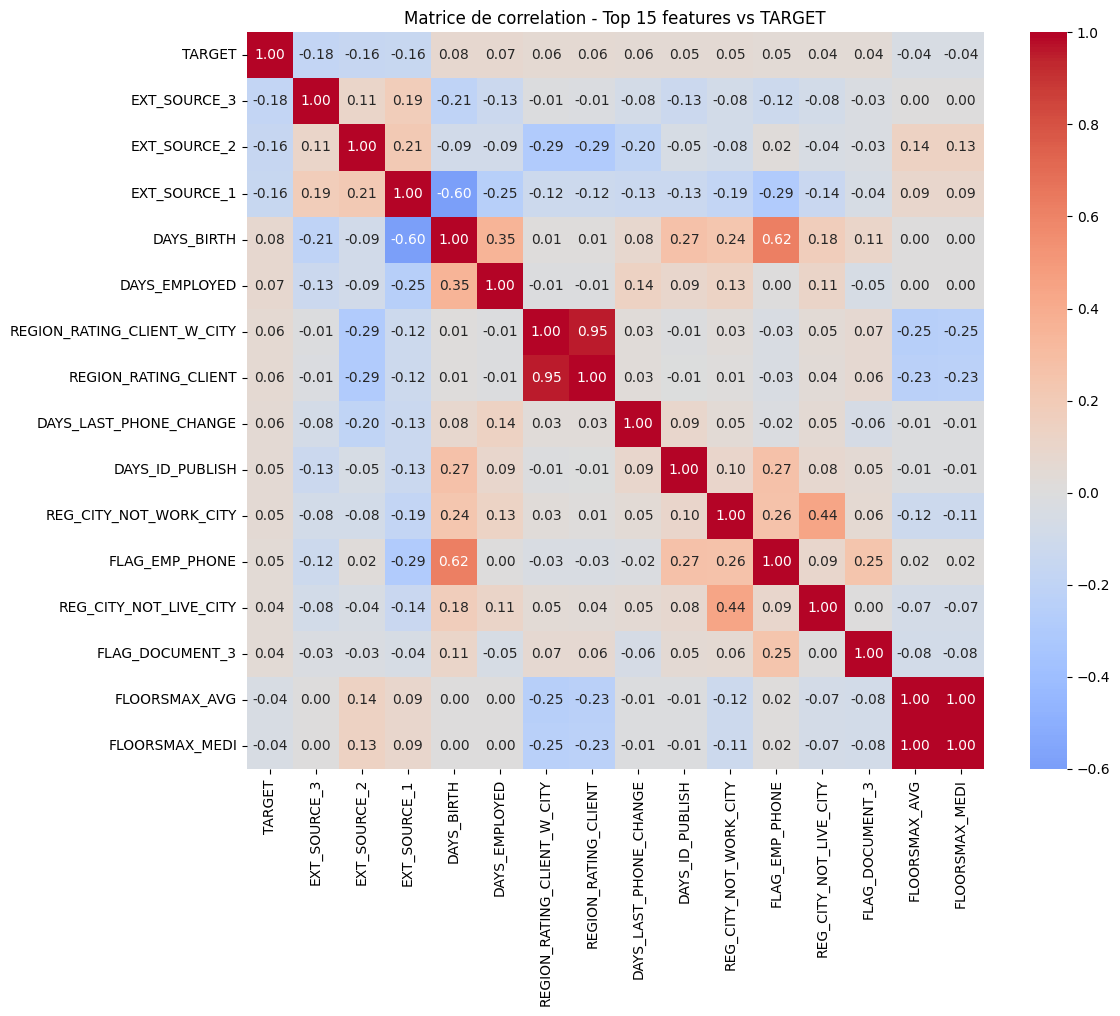

In [ ]:
top_corr_features = corr_with_target.abs().sort_values(ascending=False).head(16).index.tolist()

plt.figure(figsize=(12, 10))
corr_matrix = app_train[top_corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Matrice de correlation - Top 15 features vs TARGET')
plt.tight_layout()
plt.show()


### Analyse des EXT_SOURCE


In [ ]:
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for source in ext_sources:
    print(f"\n{source}:")
    print(f"  Missing: {app_train[source].isnull().sum()} ({app_train[source].isnull().sum()/len(app_train)*100:.2f}%)")
    print(f"  Mean: {app_train[source].mean():.4f}")
    print(f"  Correlation with TARGET: {app_train[source].corr(app_train['TARGET']):.4f}")



EXT_SOURCE_1:
  Missing: 173378 (56.38%)
  Mean: 0.5021
  Correlation with TARGET: -0.1553

EXT_SOURCE_2:
  Missing: 660 (0.21%)
  Mean: 0.5144
  Correlation with TARGET: -0.1605

EXT_SOURCE_3:
  Missing: 60965 (19.83%)
  Mean: 0.5109
  Correlation with TARGET: -0.1789


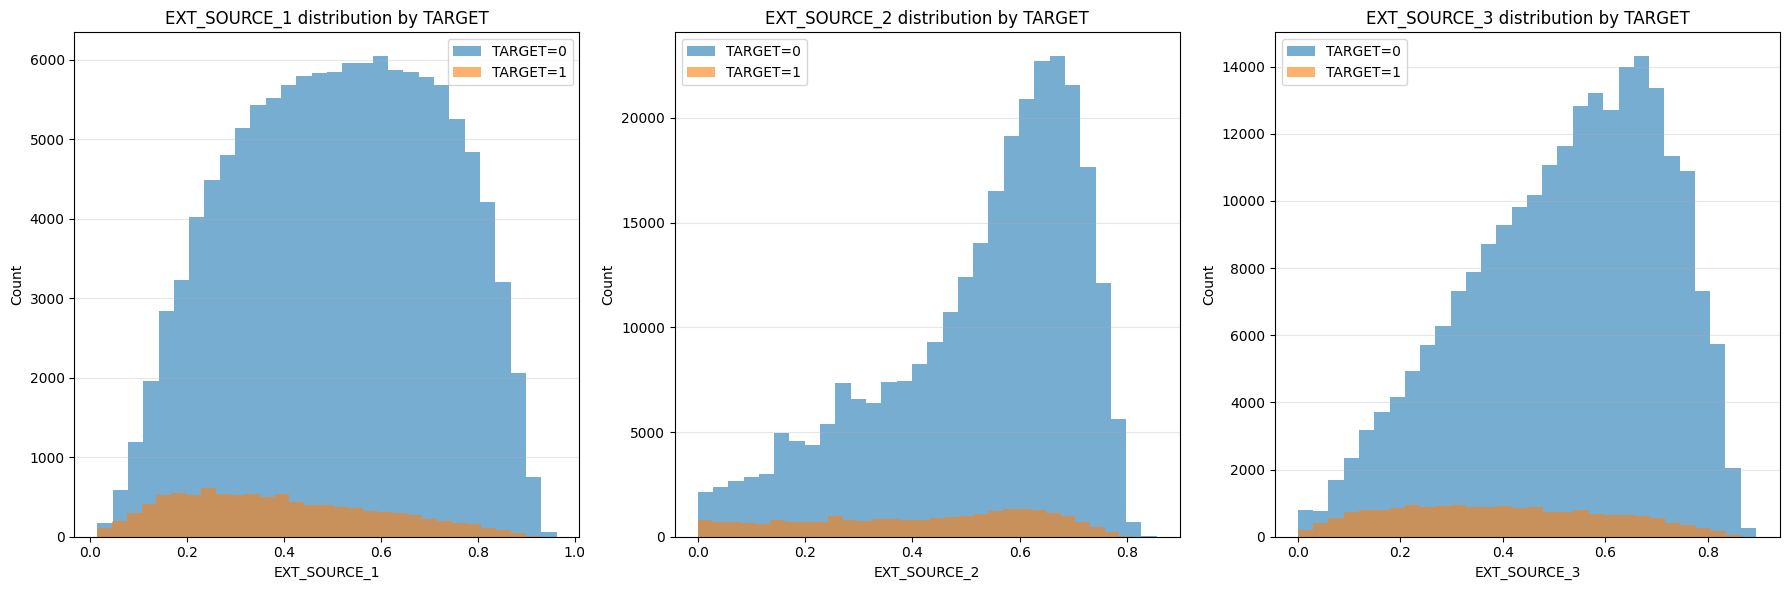

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, source in enumerate(ext_sources):
    for target in [0, 1]:
        subset = app_train[app_train['TARGET'] == target][source].dropna()
        axes[idx].hist(subset, bins=30, alpha=0.6, label=f'TARGET={target}')
    axes[idx].set_title(f'{source} distribution by TARGET')
    axes[idx].set_xlabel(source)
    axes[idx].set_ylabel('Count')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Analyse des variables de montants


In [ ]:
amt_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

comparison_df = app_train.groupby('TARGET')[amt_features].agg(['mean', 'median'])
comparison_df


AMT_INCOME_TOTAL               AMT_CREDIT             AMT_ANNUITY  \
                   mean    median           mean    median          mean   
TARGET                                                                     
0         169077.722266  148500.0  602648.282002  517788.0  27163.623349   
1         165611.760906  135000.0  557778.527674  497520.0  26481.744290   

                AMT_GOODS_PRICE            
         median            mean    median  
TARGET                                     
0       24876.0   542736.795003  450000.0  
1       25263.0   488972.412554  450000.0

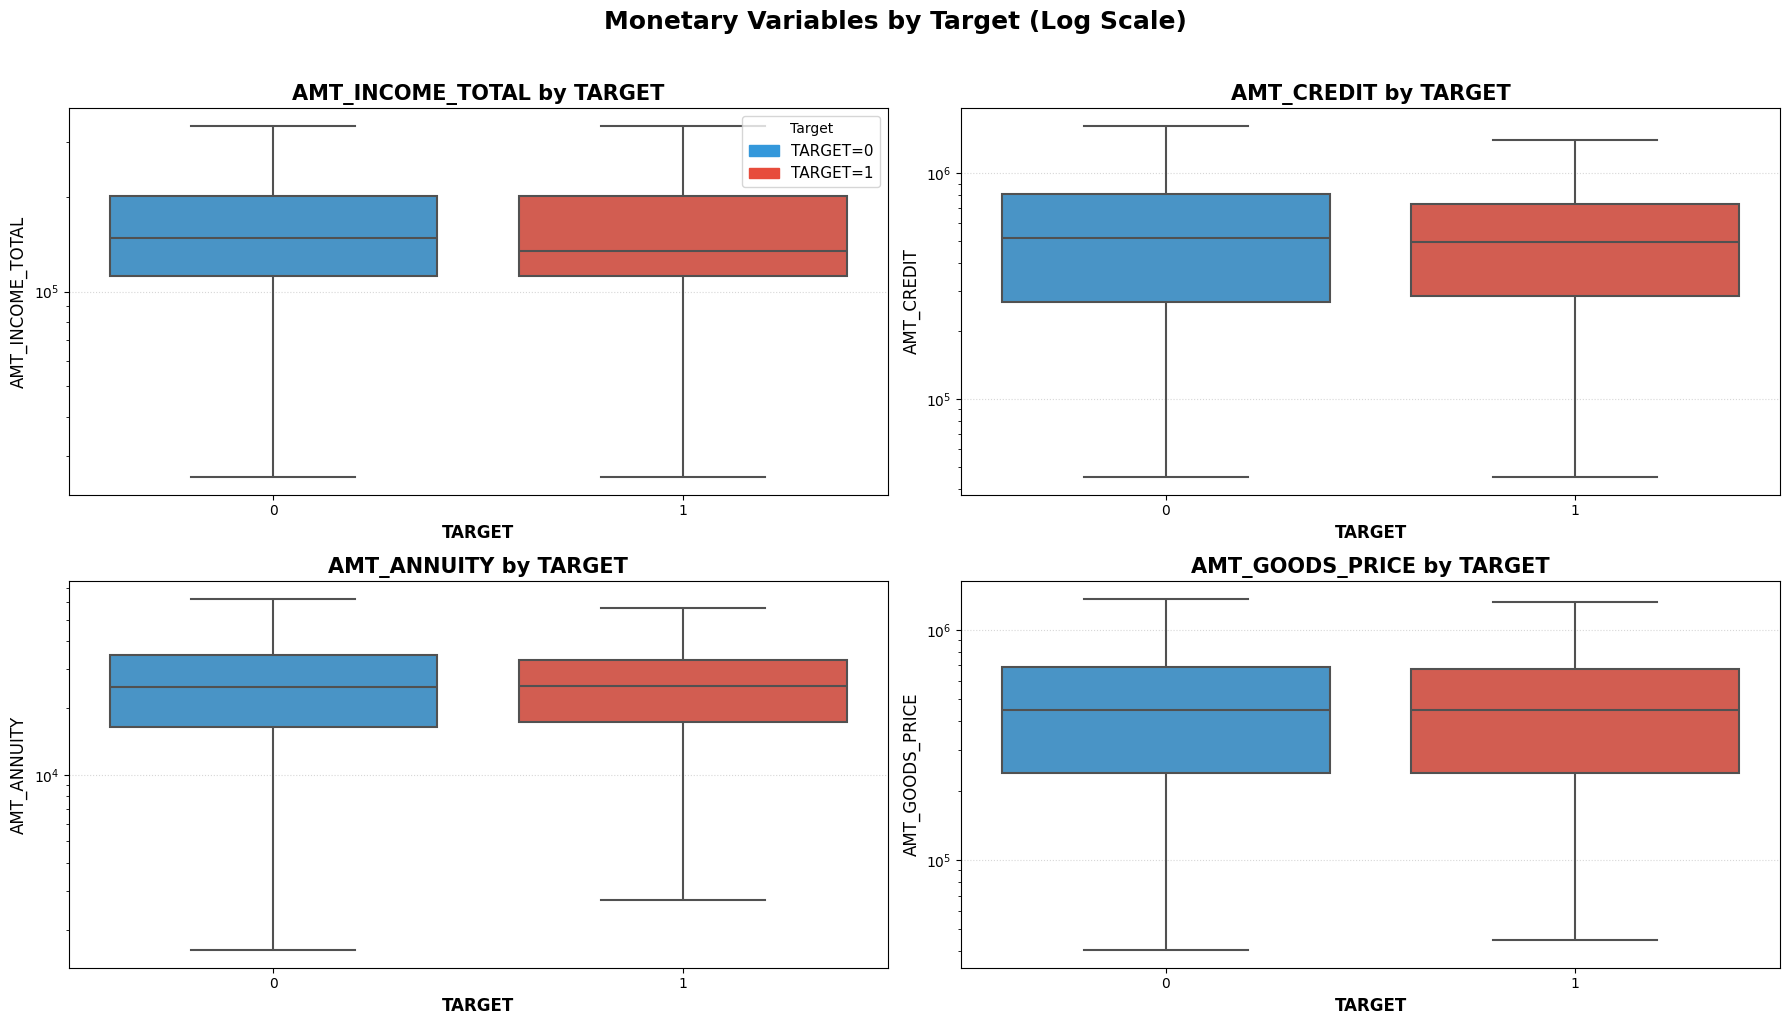

In [ ]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()
palette = {0: "#3498db", 1: "#e74c3c"}

for idx, col in enumerate(amt_features):
    # Boxplot with professional styling and color
    sns.boxplot(
        data=app_train,
        x='TARGET',
        y=col,
        ax=axes[idx],
        palette=[palette.get(val) for val in sorted(app_train['TARGET'].unique())],
        showfliers=False,
        linewidth=1.5
    )
    axes[idx].set_title(f'{col} by TARGET', fontsize=15, fontweight='bold')
    axes[idx].set_xlabel('TARGET', fontsize=12, fontweight='semibold')
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].set_yscale('log')
    axes[idx].grid(axis='y', linestyle=':', alpha=0.5)

    # Custom legend for color mapping
    if idx == 0:
        target_labels = sorted(app_train['TARGET'].unique())
        legend_handles = [
            mpatches.Patch(color=palette[target], label=f'TARGET={target}')
            for target in target_labels
        ]
        axes[idx].legend(handles=legend_handles, title='Target', loc='upper right', fontsize=11)

plt.suptitle('Monetary Variables by Target (Log Scale)', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


- Lower income is associated with a slightly higher probability of default, but the difference is not dramatic.
- Loan amount alone does not strongly separate good vs. bad borrowers; both groups borrow similar amounts overall.
- Borrowers who default tend to have higher monthly payment burdens, which may contribute to repayment difficulty.
- The cost of the purchased goods (e.g., cars, appliances, etc.) does not strongly differentiate borrowers who default.

### Analyse des variables temporelles


In [ ]:
app_train['AGE_YEARS'] = app_train['DAYS_BIRTH'] / -365.25
app_train['EMPLOYED_YEARS'] = app_train['DAYS_EMPLOYED'] / -365.25
app_train['REGISTRATION_YEARS'] = app_train['DAYS_REGISTRATION'] / -365.25
app_train['ID_PUBLISH_YEARS'] = app_train['DAYS_ID_PUBLISH'] / -365.25

print("Age distribution:")
print(app_train['AGE_YEARS'].describe())
print(f"\nCorrelation with TARGET: {app_train['AGE_YEARS'].corr(app_train['TARGET']):.4f}")


Age distribution:
count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE_YEARS, dtype: float64

Correlation with TARGET: -0.0782


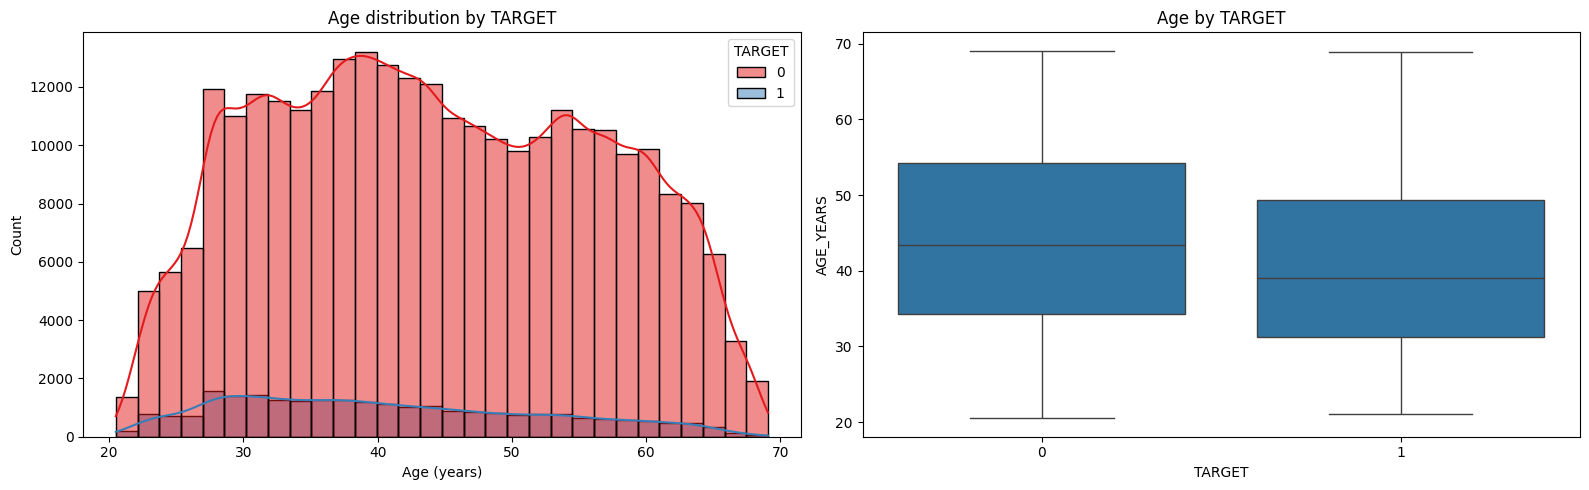

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=app_train, x='AGE_YEARS', hue='TARGET', bins=30, kde=True, ax=axes[0], palette='Set1')
axes[0].set_title('Age distribution by TARGET')
axes[0].set_xlabel('Age (years)')

sns.boxplot(data=app_train, x='TARGET', y='AGE_YEARS', ax=axes[1])
axes[1].set_title('Age by TARGET')

plt.tight_layout()
plt.show()


# Other Datasets

### Bureau
``Bureau data``

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Shape of bureau: (1716428, 17)

Columns of bureau:
 ['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

Info on bureau:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float6

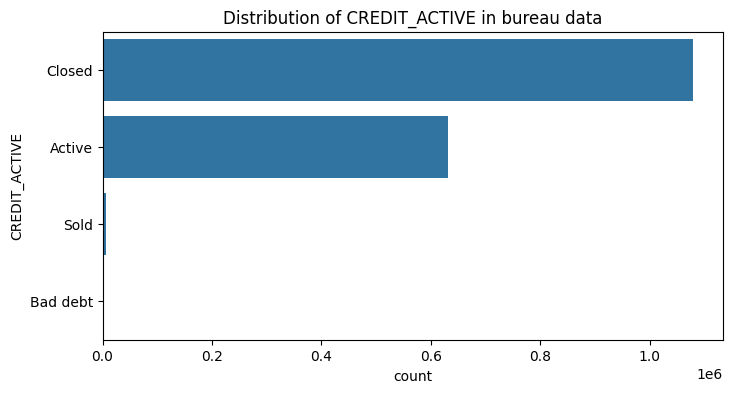

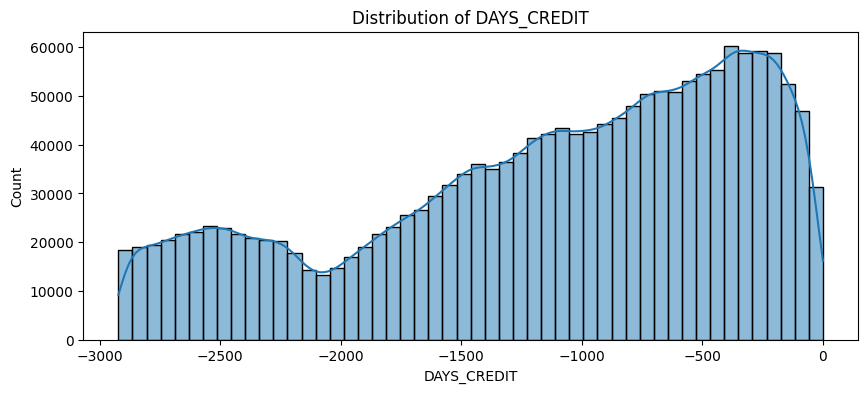

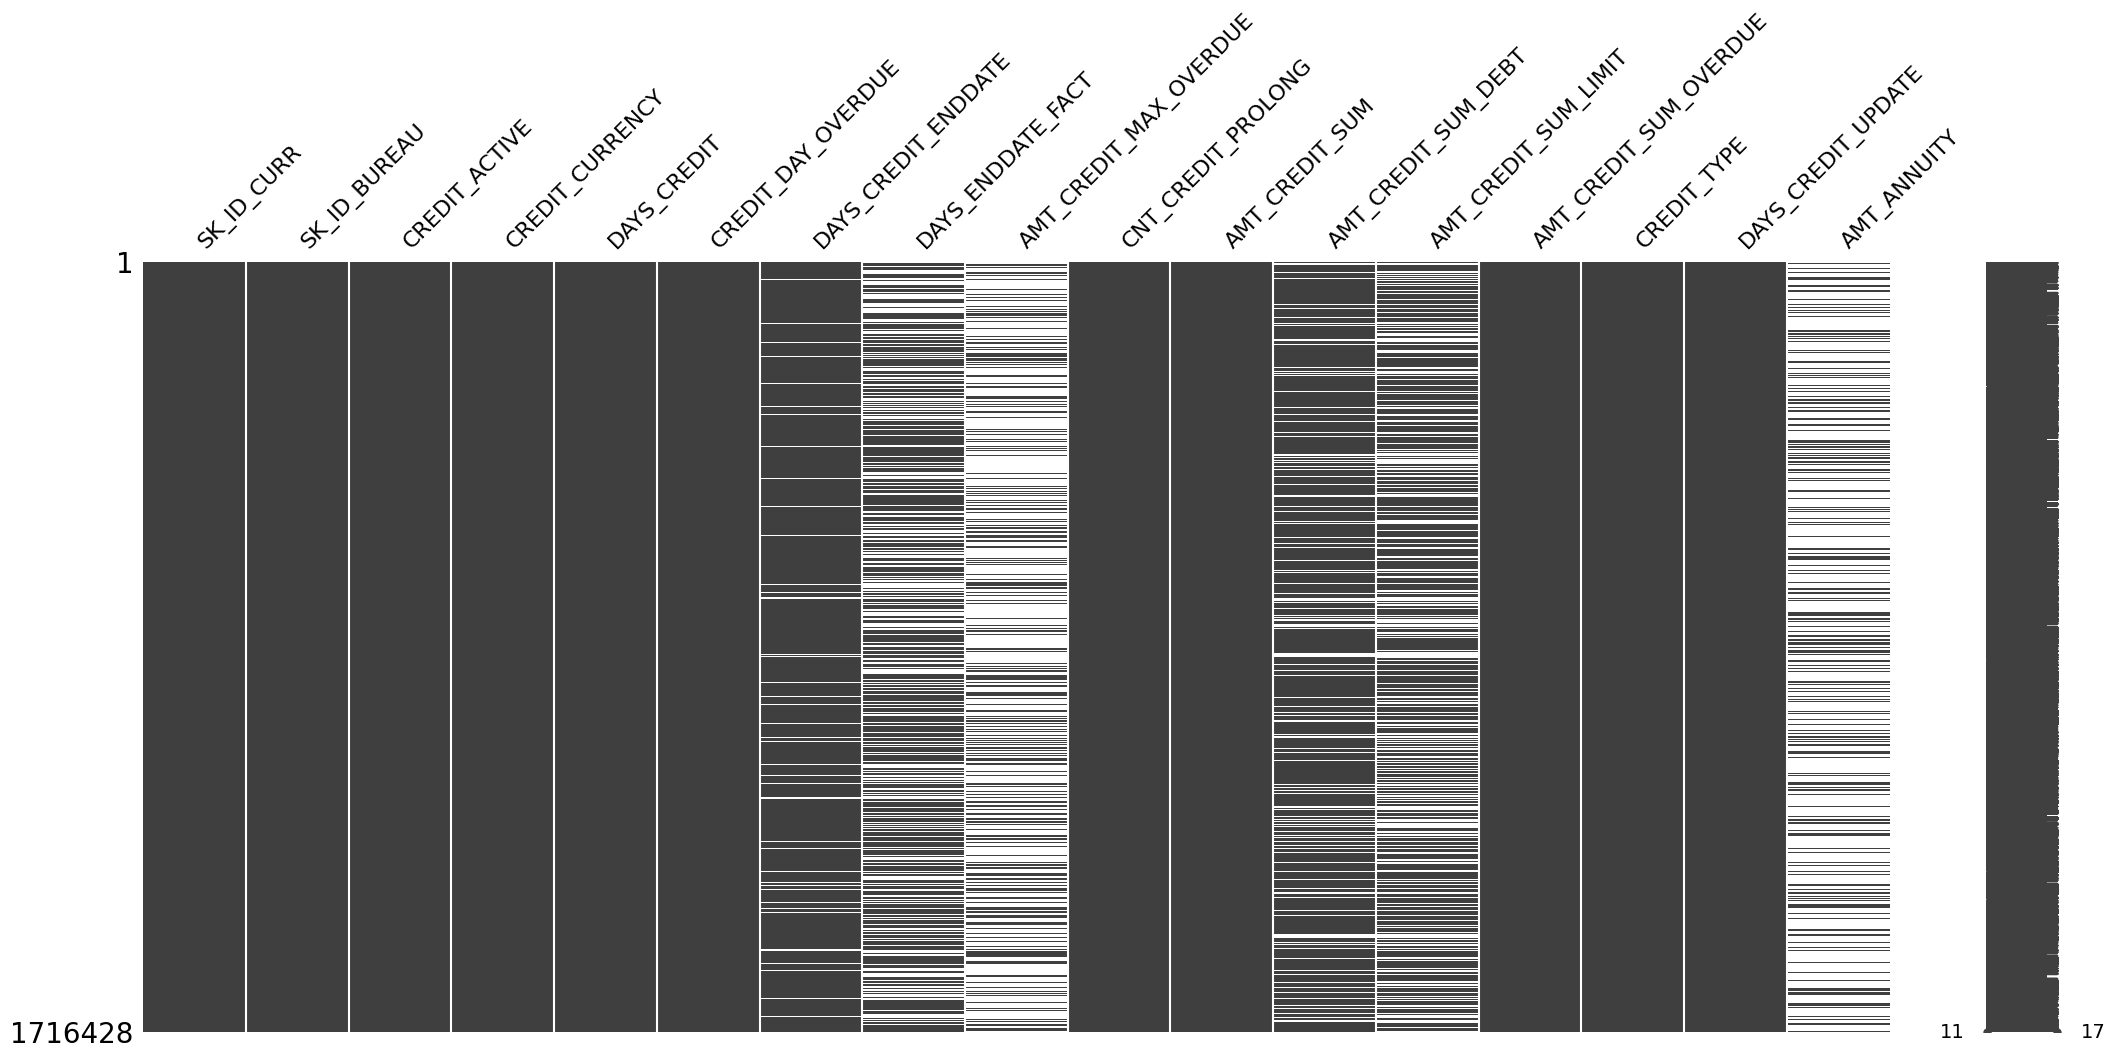


Unique clients in bureau: 305811
Unique clients in app_train: 307511
Overlap clients between app_train and bureau: 263491


In [ ]:
# Analyse du dataframe bureau

print("Shape of bureau:", bureau.shape)
print("\nColumns of bureau:\n", bureau.columns.tolist())
print("\nInfo on bureau:")
print(bureau.info())
print("\nFirst 5 rows:")
print(bureau.head())
print("\nMissing value count per column:")
print(bureau.isnull().sum())

print("\nStatistical summary (numeric columns):")
print(bureau.describe())

print("\nDistribution of CREDIT_ACTIVE:")
print(bureau['CREDIT_ACTIVE'].value_counts())

print("\nDistribution of CREDIT_TYPE:")
print(bureau['CREDIT_TYPE'].value_counts())

print("\nTargetbank - Mean/Median of DAYS_CREDIT:")
print(bureau['DAYS_CREDIT'].agg(['mean', 'median', 'min', 'max']))

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for CREDIT_ACTIVE
plt.figure(figsize=(8,4))
sns.countplot(y='CREDIT_ACTIVE', data=bureau, order=bureau['CREDIT_ACTIVE'].value_counts().index)
plt.title('Distribution of CREDIT_ACTIVE in bureau data')
plt.show()

# Histogram for DAYS_CREDIT
plt.figure(figsize=(10,4))
sns.histplot(bureau['DAYS_CREDIT'], bins=50, kde=True)
plt.title('Distribution of DAYS_CREDIT')
plt.xlabel('DAYS_CREDIT')
plt.show()

# Show missingness via matrix
import missingno as msno
msno.matrix(bureau)
plt.show()

# If SK_ID_CURR is shared with app_train, show how many unique clients and overlap
if 'SK_ID_CURR' in bureau.columns:
    n_clients_bureau = bureau['SK_ID_CURR'].nunique()
    print(f"\nUnique clients in bureau: {n_clients_bureau}")

    if 'app_train' in globals():
        n_clients_train = app_train['SK_ID_CURR'].nunique()
        n_overlap = len(set(app_train['SK_ID_CURR']).intersection(set(bureau['SK_ID_CURR'])))
        print(f"Unique clients in app_train: {n_clients_train}")
        print(f"Overlap clients between app_train and bureau: {n_overlap}")



In [ ]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

,SK_ID_CURR,PREVIOUS_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [ ]:
app_train = app_train.merge(bureau, on='SK_ID_CURR', how='left')
app_train = app_train.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
app_train.head()

: 

# Feature Engineering


### Creation de ratios financiers


In [ ]:
app_train['CREDIT_INCOME_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_RATIO'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY']
app_train['GOODS_PRICE_RATIO'] = app_train['AMT_GOODS_PRICE'] / app_train['AMT_CREDIT']

new_features = ['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_TERM', 'GOODS_PRICE_RATIO']

print("Correlation des nouveaux ratios avec TARGET:")
for feat in new_features:
    corr = app_train[feat].corr(app_train['TARGET'])
    print(f"{feat}: {corr:.4f}")


Correlation des nouveaux ratios avec TARGET:
CREDIT_INCOME_RATIO: -0.0077
ANNUITY_INCOME_RATIO: 0.0143
CREDIT_TERM: -0.0321
GOODS_PRICE_RATIO: -0.0654


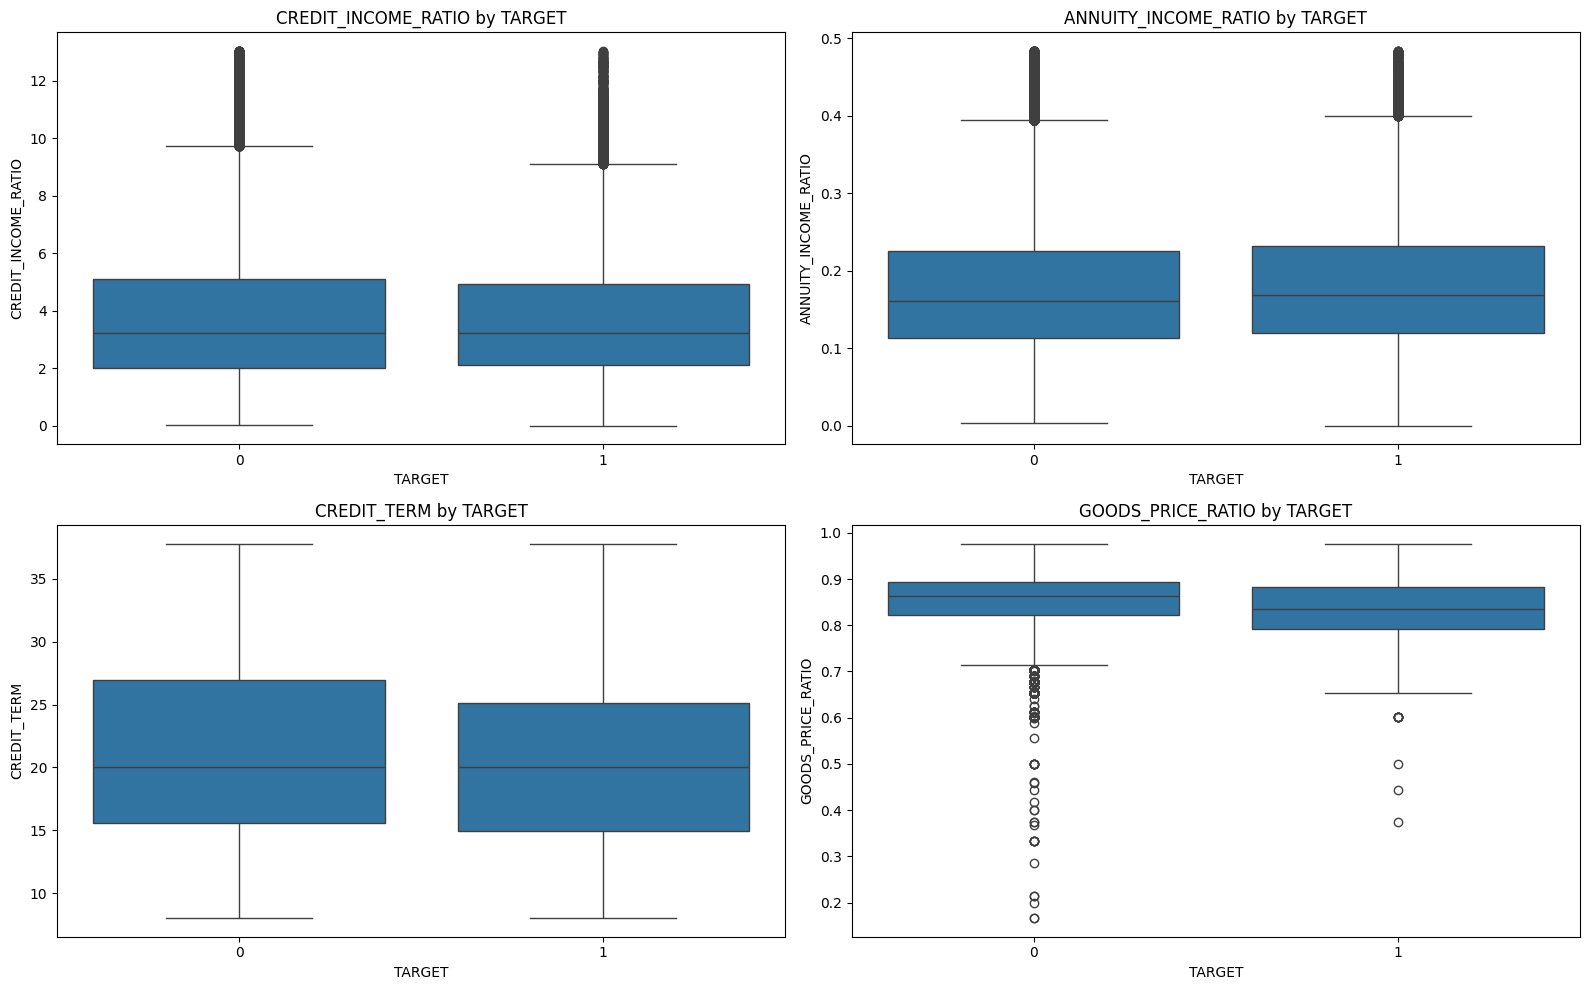

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, feat in enumerate(new_features):
    data = app_train[app_train[feat].notna() & (app_train[feat] < app_train[feat].quantile(0.99))]
    sns.boxplot(data=data, x='TARGET', y=feat, ax=axes[idx])
    axes[idx].set_title(f'{feat} by TARGET')

plt.tight_layout()
plt.show()


### Aggregations des EXT_SOURCE


In [ ]:
app_train['EXT_SOURCE_MEAN'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_train['EXT_SOURCE_MIN'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min(axis=1)
app_train['EXT_SOURCE_MAX'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max(axis=1)
app_train['EXT_SOURCE_STD'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
app_train['EXT_SOURCE_PROD'] = app_train['EXT_SOURCE_1'] * app_train['EXT_SOURCE_2'] * app_train['EXT_SOURCE_3']

ext_features = ['EXT_SOURCE_MEAN', 'EXT_SOURCE_MIN', 'EXT_SOURCE_MAX', 'EXT_SOURCE_STD', 'EXT_SOURCE_PROD']

print("Correlation des agregations EXT_SOURCE avec TARGET:")
for feat in ext_features:
    corr = app_train[feat].corr(app_train['TARGET'])
    print(f"{feat}: {corr:.4f}")


Correlation des agregations EXT_SOURCE avec TARGET:
EXT_SOURCE_MEAN: -0.2221
EXT_SOURCE_MIN: -0.1853
EXT_SOURCE_MAX: -0.1969
EXT_SOURCE_STD: 0.0477
EXT_SOURCE_PROD: -0.1886


### Features de documents


In [ ]:
document_cols = [col for col in app_train.columns if 'FLAG_DOCUMENT' in col]

app_train['DOCUMENT_COUNT'] = app_train[document_cols].sum(axis=1)

print(f"Nombre moyen de documents fournis: {app_train['DOCUMENT_COUNT'].mean():.2f}")
print(f"Correlation avec TARGET: {app_train['DOCUMENT_COUNT'].corr(app_train['TARGET']):.4f}")

app_train.groupby('TARGET')['DOCUMENT_COUNT'].describe()


Nombre moyen de documents fournis: 0.93
Correlation avec TARGET: 0.0172


,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,0.928401,0.349038,0.0,1.0,1.0,1.0,3.0
1,24825.0,0.950131,0.284004,0.0,1.0,1.0,1.0,4.0


### Features additionnelles


In [ ]:
app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_train['ANNUITY_PER_PERSON'] = app_train['AMT_ANNUITY'] / app_train['CNT_FAM_MEMBERS']
app_train['INCOME_PER_CHILD'] = app_train['AMT_INCOME_TOTAL'] / (app_train['CNT_CHILDREN'] + 1)
app_train['EMPLOYED_TO_AGE_RATIO'] = app_train['EMPLOYED_YEARS'] / app_train['AGE_YEARS']
app_train['CREDIT_TO_AGE_RATIO'] = app_train['AMT_CREDIT'] / app_train['AGE_YEARS']

additional_features = ['INCOME_PER_PERSON', 'ANNUITY_PER_PERSON', 'INCOME_PER_CHILD', 
                       'EMPLOYED_TO_AGE_RATIO', 'CREDIT_TO_AGE_RATIO']

print("Correlation des features additionnelles avec TARGET:")
for feat in additional_features:
    corr = app_train[feat].corr(app_train['TARGET'])
    print(f"{feat}: {corr:.4f}")


Correlation des features additionnelles avec TARGET:
INCOME_PER_PERSON: -0.0066
ANNUITY_PER_PERSON: -0.0084
INCOME_PER_CHILD: -0.0125
EMPLOYED_TO_AGE_RATIO: -0.0680
CREDIT_TO_AGE_RATIO: -0.0027


### Analyse des variables categorielles


In [ ]:
categorical_cols = app_train.select_dtypes(include=['object']).columns.tolist()

print(f"Nombre de variables categorielles: {len(categorical_cols)}")
print(f"\nVariables categorielles: {categorical_cols}")


Nombre de variables categorielles: 16

Variables categorielles: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
key_categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

for col in key_categorical:
    if col in app_train.columns:
        print(f"\n{col}:")
        print(app_train.groupby(col)['TARGET'].agg(['count', 'mean']).sort_values('mean', ascending=False))



NAME_CONTRACT_TYPE:
                     count      mean
NAME_CONTRACT_TYPE                  
Cash loans          278232  0.083459
Revolving loans      29279  0.054783

CODE_GENDER:
              count      mean
CODE_GENDER                  
M            105059  0.101419
F            202448  0.069993
XNA               4  0.000000

NAME_INCOME_TYPE:
                       count      mean
NAME_INCOME_TYPE                      
Maternity leave            5  0.400000
Unemployed                22  0.363636
Working               158774  0.095885
Commercial associate   71617  0.074843
State servant          21703  0.057550
Pensioner              55362  0.053864
Businessman               10  0.000000
Student                   18  0.000000

NAME_EDUCATION_TYPE:
                                count      mean
NAME_EDUCATION_TYPE                            
Lower secondary                  3816  0.109277
Secondary / secondary special  218391  0.089399
Incomplete higher               10277  0.084

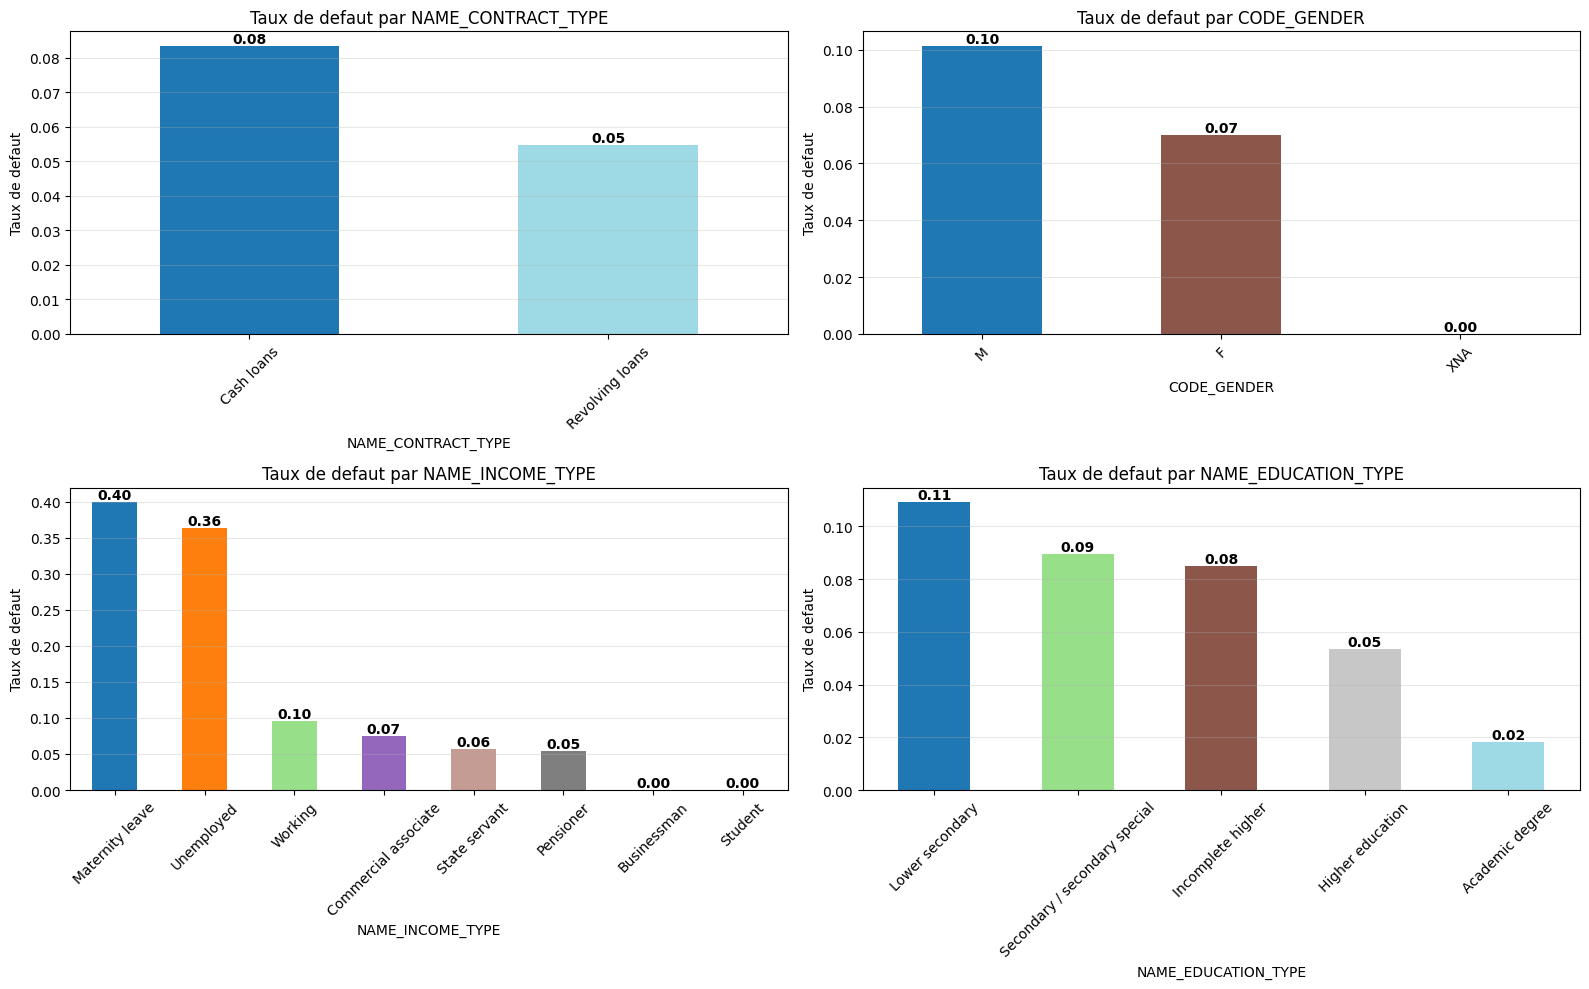

In [ ]:
import matplotlib.cm as cm
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    if col in app_train.columns:
        target_rate = app_train.groupby(col)['TARGET'].mean().sort_values(ascending=False)
        n_cats = len(target_rate)
        # Generate a distinguishable color for each category
        colors = cm.get_cmap('tab20', n_cats)(np.arange(n_cats))
        bars = target_rate.plot(
            kind='bar', 
            ax=axes[idx], 
            color=colors
        )
        axes[idx].set_title(f'Taux de defaut par {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Taux de defaut')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)

        # Add values on top of each bar (bold font)
        for bar in axes[idx].patches:
            value = bar.get_height()
            if not np.isnan(value):
                axes[idx].annotate(f"{value:.2f}",
                                  (bar.get_x() + bar.get_width() / 2, value),
                                  ha='center', va='bottom',
                                  fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


### Resume des features creees


In [ ]:
engineered_features = (
    ['AGE_YEARS', 'EMPLOYED_YEARS', 'REGISTRATION_YEARS', 'ID_PUBLISH_YEARS'] +
    new_features + 
    ext_features + 
    ['DOCUMENT_COUNT'] + 
    additional_features
)

print(f"Nombre total de features creees: {len(engineered_features)}")
print(f"\nFeatures creees:")
for feat in engineered_features:
    print(f"  - {feat}")


Nombre total de features creees: 19

Features creees:
  - AGE_YEARS
  - EMPLOYED_YEARS
  - REGISTRATION_YEARS
  - ID_PUBLISH_YEARS
  - CREDIT_INCOME_RATIO
  - ANNUITY_INCOME_RATIO
  - CREDIT_TERM
  - GOODS_PRICE_RATIO
  - EXT_SOURCE_MEAN
  - EXT_SOURCE_MIN
  - EXT_SOURCE_MAX
  - EXT_SOURCE_STD
  - EXT_SOURCE_PROD
  - DOCUMENT_COUNT
  - INCOME_PER_PERSON
  - ANNUITY_PER_PERSON
  - INCOME_PER_CHILD
  - EMPLOYED_TO_AGE_RATIO
  - CREDIT_TO_AGE_RATIO


In [ ]:
engineered_corr = app_train[engineered_features + ['TARGET']].corrwith(app_train['TARGET']).abs().sort_values(ascending=False)

print("Top 10 features creees les plus correlees avec TARGET:")
print(engineered_corr.head(11))


Top 10 features creees les plus correlees avec TARGET:
TARGET                   1.000000
EXT_SOURCE_MEAN          0.222052
EXT_SOURCE_MAX           0.196876
EXT_SOURCE_PROD          0.188552
EXT_SOURCE_MIN           0.185266
AGE_YEARS                0.078239
EMPLOYED_YEARS           0.074957
EMPLOYED_TO_AGE_RATIO    0.067952
GOODS_PRICE_RATIO        0.065407
ID_PUBLISH_YEARS         0.051457
EXT_SOURCE_STD           0.047700
dtype: float64


# Hypotheses sur les facteurs de defaut de paiement


### Hypothese 1: Les jeunes clients ont plus de risque de defaut


Analyse du taux de defaut par tranche d'age:
           Total  Defauts  Taux_Defaut  Taux_Defaut_Pct
AGE_GROUP                                              
<25        12233     1504       0.1229            12.29
25-35      72429     7721       0.1066            10.66
35-45      84261     7085       0.0841             8.41
45-55      70190     4946       0.0705             7.05
55-65      60522     3281       0.0542             5.42
65+         7876      288       0.0366             3.66


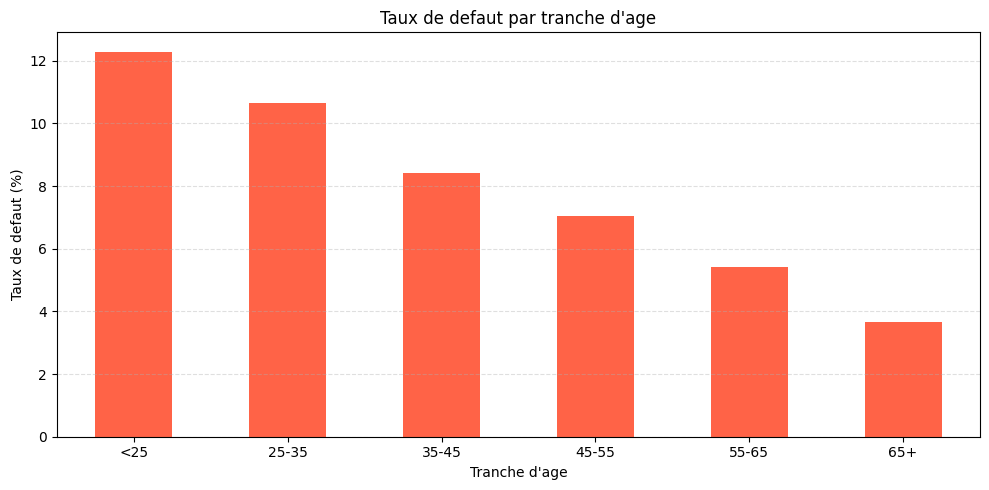

In [ ]:
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
app_train['AGE_GROUP'] = pd.cut(app_train['AGE_YEARS'], bins=age_bins, labels=age_labels)

age_analysis = app_train.groupby('AGE_GROUP', observed=True).agg({
    'TARGET': ['count', 'sum', 'mean']
}).round(4)
age_analysis.columns = ['Total', 'Defauts', 'Taux_Defaut']
age_analysis['Taux_Defaut_Pct'] = (age_analysis['Taux_Defaut'] * 100).round(2)

print("Analyse du taux de defaut par tranche d'age:")
print(age_analysis)

# Plot to showcase age default rates
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
age_analysis['Taux_Defaut_Pct'].plot(kind='bar', color='tomato')
plt.title("Taux de defaut par tranche d'age")
plt.xlabel("Tranche d'age")
plt.ylabel("Taux de defaut (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


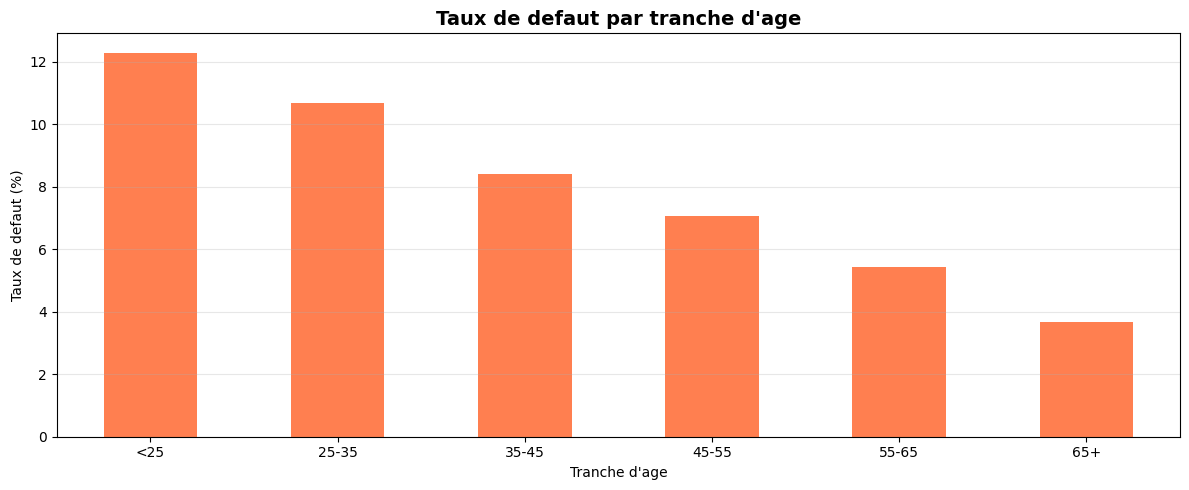


Conclusion: Les clients ages de 25-35 ans ont le taux de defaut le plus eleve.


In [ ]:
plt.figure(figsize=(12, 5))
age_analysis['Taux_Defaut_Pct'].plot(kind='bar', color='coral')
plt.title('Taux de defaut par tranche d\'age', fontsize=14, fontweight='bold')
plt.xlabel('Tranche d\'age')
plt.ylabel('Taux de defaut (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nConclusion: Les clients ages de 25-35 ans ont le taux de defaut le plus eleve.")


### Hypothese 2: Un ratio credit/revenu eleve augmente le risque


In [ ]:
credit_ratio_bins = [0, 2, 4, 6, 8, 10, 100]
credit_ratio_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
app_train['CREDIT_RATIO_GROUP'] = pd.cut(app_train['CREDIT_INCOME_RATIO'], bins=credit_ratio_bins, labels=credit_ratio_labels)

ratio_analysis = app_train.groupby('CREDIT_RATIO_GROUP', observed=True).agg({
    'TARGET': ['count', 'mean']
}).round(4)
ratio_analysis.columns = ['Total', 'Taux_Defaut']
ratio_analysis['Taux_Defaut_Pct'] = (ratio_analysis['Taux_Defaut'] * 100).round(2)

print("Analyse du taux de defaut par ratio Credit/Revenu:")
print(ratio_analysis)


Analyse du taux de defaut par ratio Credit/Revenu:
                     Total  Taux_Defaut  Taux_Defaut_Pct
CREDIT_RATIO_GROUP                                      
0-2                  76338       0.0743             7.43
2-4                 113561       0.0887             8.87
4-6                  62887       0.0813             8.13
6-8                  30576       0.0736             7.36
8-10                 14305       0.0730             7.30
10+                   9844       0.0684             6.84


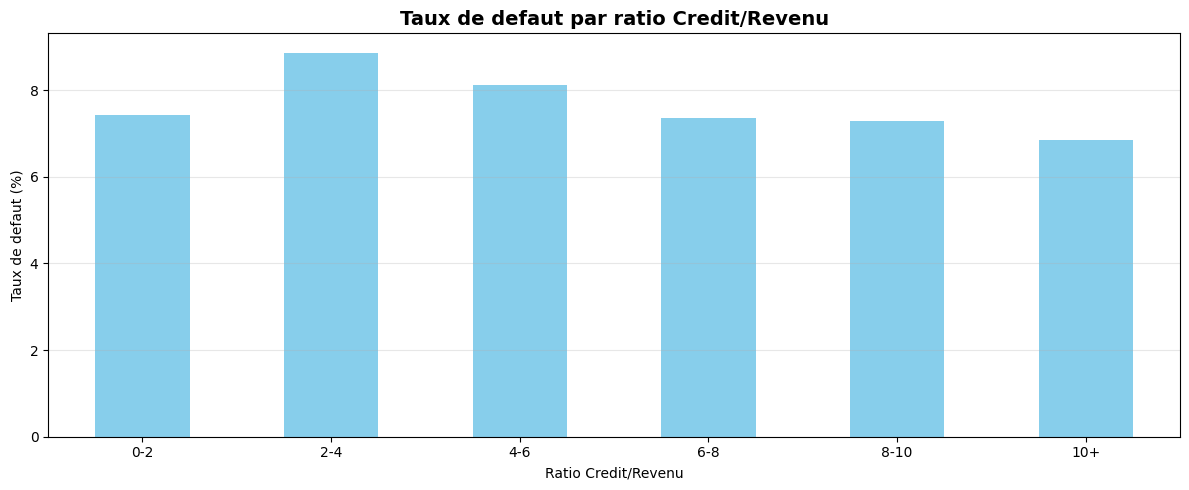


Conclusion: Plus le ratio credit/revenu est eleve, plus le risque de defaut augmente.


In [ ]:
plt.figure(figsize=(12, 5))
ratio_analysis['Taux_Defaut_Pct'].plot(kind='bar', color='skyblue')
plt.title('Taux de defaut par ratio Credit/Revenu', fontsize=14, fontweight='bold')
plt.xlabel('Ratio Credit/Revenu')
plt.ylabel('Taux de defaut (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nConclusion: Plus le ratio credit/revenu est eleve, plus le risque de defaut augmente.")


### Hypothese 3: Les scores externes (EXT_SOURCE) sont des predicteurs forts


In [ ]:
for source in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
    app_train[f'{source}_GROUP'] = pd.cut(app_train[source], bins=bins, labels=labels)
    
    analysis = app_train.groupby(f'{source}_GROUP', observed=True).agg({
        'TARGET': ['count', 'mean']
    }).round(4)
    analysis.columns = ['Total', 'Taux_Defaut']
    
    print(f"\n{source}:")
    print(f"Correlation: {app_train[source].corr(app_train['TARGET']):.4f}")
    print(analysis)



EXT_SOURCE_1:
Correlation: -0.1553
                    Total  Taux_Defaut
EXT_SOURCE_1_GROUP                    
0-0.2               11661       0.1823
0.2-0.4             34542       0.1031
0.4-0.6             39702       0.0642
0.6-0.8             36986       0.0416
0.8-1.0             11242       0.0246

EXT_SOURCE_2:
Correlation: -0.1605
                     Total  Taux_Defaut
EXT_SOURCE_2_GROUP                     
0-0.2                27865       0.1884
0.2-0.4              51078       0.1162
0.4-0.6              98869       0.0779
0.6-0.8             128470       0.0457
0.8-1.0                569       0.0176

EXT_SOURCE_3:
Correlation: -0.1789
                    Total  Taux_Defaut
EXT_SOURCE_3_GROUP                    
0-0.2               19514       0.2094
0.2-0.4             52072       0.1178
0.4-0.6             80777       0.0652
0.6-0.8             84924       0.0400
0.8-1.0              9259       0.0287


In [ ]:
print("\nConclusion: Un score EXT_SOURCE bas (proche de 0) est fortement associe a un risque eleve de defaut.")
print("EXT_SOURCE_2 et EXT_SOURCE_3 sont les predicteurs les plus forts (correlation negative forte).")



Conclusion: Un score EXT_SOURCE bas (proche de 0) est fortement associe a un risque eleve de defaut.
EXT_SOURCE_2 et EXT_SOURCE_3 sont les predicteurs les plus forts (correlation negative forte).


### Hypothese 4: Le type de revenu et le genre influencent le risque


In [ ]:
income_analysis = app_train.groupby('NAME_INCOME_TYPE').agg({
    'TARGET': ['count', 'mean']
}).round(4)
income_analysis.columns = ['Total', 'Taux_Defaut']
income_analysis['Taux_Defaut_Pct'] = (income_analysis['Taux_Defaut'] * 100).round(2)
income_analysis = income_analysis.sort_values('Taux_Defaut', ascending=False)

print("Taux de defaut par type de revenu:")
print(income_analysis)

gender_analysis = app_train.groupby('CODE_GENDER').agg({
    'TARGET': ['count', 'mean']
}).round(4)
gender_analysis.columns = ['Total', 'Taux_Defaut']
gender_analysis['Taux_Defaut_Pct'] = (gender_analysis['Taux_Defaut'] * 100).round(2)

print("\nTaux de defaut par genre:")
print(gender_analysis)


Taux de defaut par type de revenu:
                       Total  Taux_Defaut  Taux_Defaut_Pct
NAME_INCOME_TYPE                                          
Maternity leave            5       0.4000            40.00
Unemployed                22       0.3636            36.36
Working               158774       0.0959             9.59
Commercial associate   71617       0.0748             7.48
State servant          21703       0.0575             5.75
Pensioner              55362       0.0539             5.39
Businessman               10       0.0000             0.00
Student                   18       0.0000             0.00

Taux de defaut par genre:
              Total  Taux_Defaut  Taux_Defaut_Pct
CODE_GENDER                                      
F            202448       0.0700             7.00
M            105059       0.1014            10.14
XNA               4       0.0000             0.00


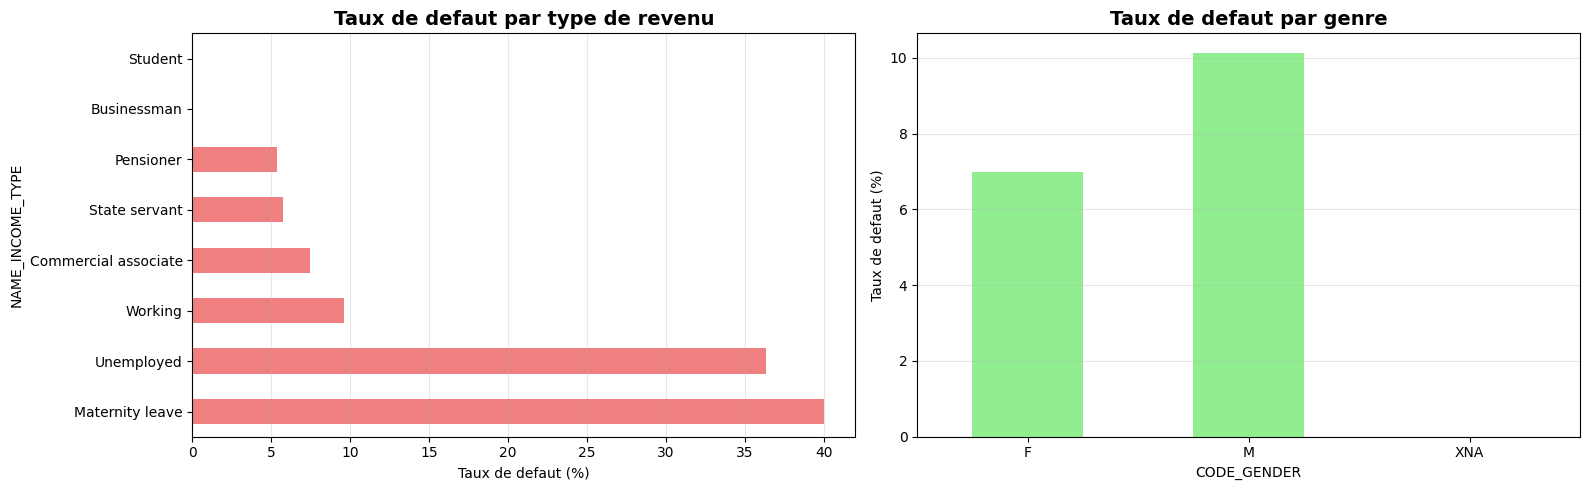


Conclusion: Les personnes en conge de maternite et les chomeurs ont un taux de defaut plus eleve.
Les hommes ont un taux de defaut legerement superieur aux femmes.


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

income_analysis['Taux_Defaut_Pct'].plot(kind='barh', ax=axes[0], color='lightcoral')
axes[0].set_title('Taux de defaut par type de revenu', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Taux de defaut (%)')
axes[0].grid(axis='x', alpha=0.3)

gender_analysis['Taux_Defaut_Pct'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Taux de defaut par genre', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Taux de defaut (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConclusion: Les personnes en conge de maternite et les chomeurs ont un taux de defaut plus eleve.")
print("Les hommes ont un taux de defaut legerement superieur aux femmes.")


### Hypothese 5: La stabilite de l'emploi reduit le risque


In [ ]:
employed_bins = [-1, 0, 1, 3, 5, 10, 100]
employed_labels = ['Sans emploi', '<1 an', '1-3 ans', '3-5 ans', '5-10 ans', '10+ ans']
app_train['EMPLOYED_GROUP'] = pd.cut(app_train['EMPLOYED_YEARS'], bins=employed_bins, labels=employed_labels)

employed_analysis = app_train.groupby('EMPLOYED_GROUP', observed=True).agg({
    'TARGET': ['count', 'mean']
}).round(4)
employed_analysis.columns = ['Total', 'Taux_Defaut']
employed_analysis['Taux_Defaut_Pct'] = (employed_analysis['Taux_Defaut'] * 100).round(2)

print("Taux de defaut par anciennete d'emploi:")
print(employed_analysis)


Taux de defaut par anciennete d'emploi:
                Total  Taux_Defaut  Taux_Defaut_Pct
EMPLOYED_GROUP                                     
<1 an           27982       0.1097            10.97
1-3 ans         61472       0.1107            11.07
3-5 ans         46902       0.0967             9.67
5-10 ans        64871       0.0737             7.37
10+ ans         50910       0.0519             5.19


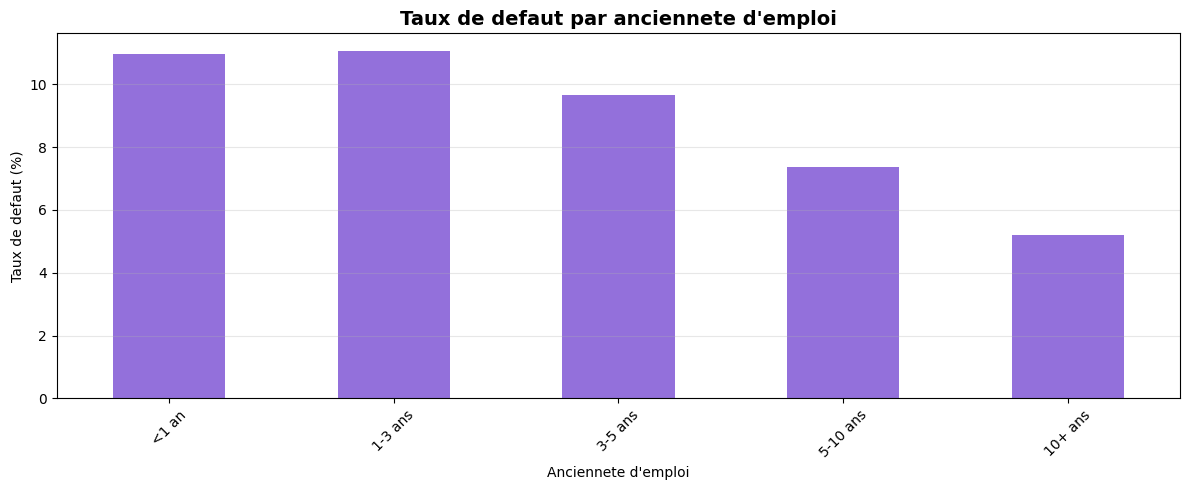


Conclusion: Une anciennete d'emploi plus longue reduit le risque de defaut.


In [ ]:
plt.figure(figsize=(12, 5))
employed_analysis['Taux_Defaut_Pct'].plot(kind='bar', color='mediumpurple')
plt.title('Taux de defaut par anciennete d\'emploi', fontsize=14, fontweight='bold')
plt.xlabel('Anciennete d\'emploi')
plt.ylabel('Taux de defaut (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nConclusion: Une anciennete d'emploi plus longue reduit le risque de defaut.")


### Hypothese 6: Le niveau d'education influence le risque


Taux de defaut par niveau d'education:
                                Total  Taux_Defaut  Taux_Defaut_Pct
NAME_EDUCATION_TYPE                                                
Lower secondary                  3816       0.1093            10.93
Secondary / secondary special  218391       0.0894             8.94
Incomplete higher               10277       0.0848             8.48
Higher education                74863       0.0536             5.36
Academic degree                   164       0.0183             1.83


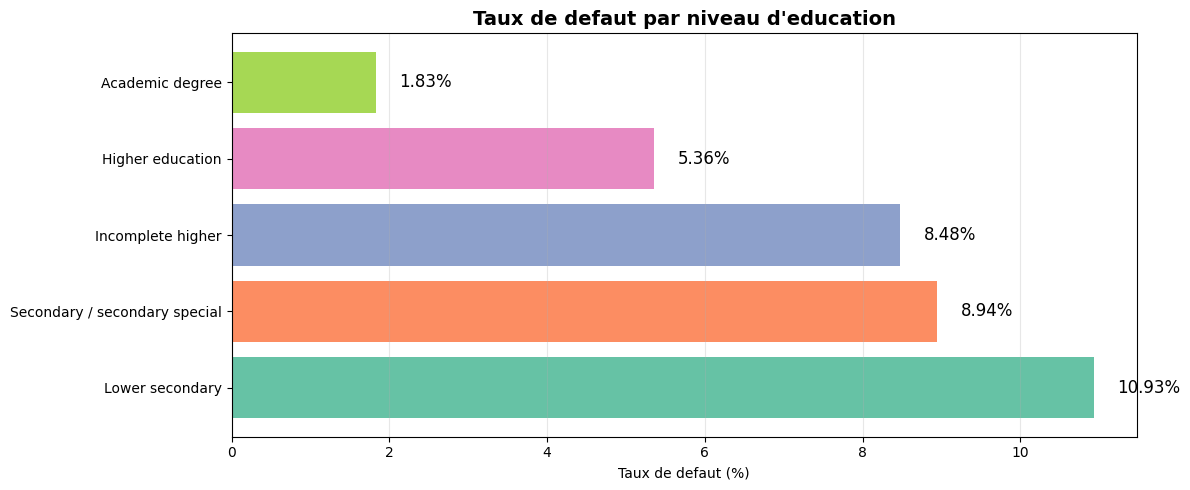


Conclusion: Les personnes avec un niveau d'education secondaire ont un risque plus eleve.


In [ ]:
education_analysis = app_train.groupby('NAME_EDUCATION_TYPE').agg({
    'TARGET': ['count', 'mean']
}).round(4)
education_analysis.columns = ['Total', 'Taux_Defaut']
education_analysis['Taux_Defaut_Pct'] = (education_analysis['Taux_Defaut'] * 100).round(2)
education_analysis = education_analysis.sort_values('Taux_Defaut', ascending=False)

print("Taux de defaut par niveau d'education:")
print(education_analysis)

import seaborn as sns

plt.figure(figsize=(12, 5))
# Générer une palette de couleurs différentes pour chaque barre
n_bars = education_analysis.shape[0]
colors = sns.color_palette("Set2", n_colors=n_bars)

bars = plt.barh(
    education_analysis.index,
    education_analysis['Taux_Defaut_Pct'],
    color=colors
)

plt.title('Taux de defaut par niveau d\'education', fontsize=14, fontweight='bold')
plt.xlabel('Taux de defaut (%)')
plt.grid(axis='x', alpha=0.3)

# Ajouter le pourcentage à côté de chaque barre
for bar, pct in zip(bars, education_analysis['Taux_Defaut_Pct']):
    plt.text(
        pct + 0.3,  # position après la barre
        bar.get_y() + bar.get_height()/2,
        f"{pct:.2f}%", 
        va='center', 
        ha='left', 
        fontsize=12
    )

plt.tight_layout()
plt.show()

print("\nConclusion: Les personnes avec un niveau d'education secondaire ont un risque plus eleve.")


### Synthese des hypotheses validees


In [ ]:
hypotheses_results = pd.DataFrame({
    'Hypothese': [
        'Age (25-35 ans)',
        'Ratio Credit/Revenu eleve',
        'Score EXT_SOURCE bas',
        'Type de revenu (Conge maternite/Chomage)',
        'Faible anciennete emploi',
        'Niveau education secondaire'
    ],
    'Impact_sur_defaut': [
        'Augmente',
        'Augmente',
        'Augmente fortement',
        'Augmente',
        'Augmente',
        'Augmente'
    ],
    'Force_predictive': [
        'Moderee',
        'Forte',
        'Tres forte',
        'Moderee',
        'Forte',
        'Moderee'
    ],
    'Validee': [
        'Oui',
        'Oui',
        'Oui',
        'Oui',
        'Oui',
        'Oui'
    ]
})

print("="*80)
print("SYNTHESE DES HYPOTHESES SUR LES FACTEURS DE DEFAUT DE PAIEMENT")
print("="*80)
print(hypotheses_results.to_string(index=False))
print("="*80)


SYNTHESE DES HYPOTHESES SUR LES FACTEURS DE DEFAUT DE PAIEMENT
                               Hypothese  Impact_sur_defaut Force_predictive Validee
                         Age (25-35 ans)           Augmente          Moderee     Oui
               Ratio Credit/Revenu eleve           Augmente            Forte     Oui
                    Score EXT_SOURCE bas Augmente fortement       Tres forte     Oui
Type de revenu (Conge maternite/Chomage)           Augmente          Moderee     Oui
                Faible anciennete emploi           Augmente            Forte     Oui
             Niveau education secondaire           Augmente          Moderee     Oui


## Profil type d'un client a risque

Basé sur l'analyse EDA, un client avec un risque élevé de défaut présente généralement:

### Caractéristiques démographiques
- Age entre 25-35 ans
- Homme
- Niveau d'éducation secondaire

### Situation professionnelle
- Sans emploi, en congé maternité ou faible ancienneté (<1 an)
- Revenus instables ou faibles

### Situation financière
- Ratio crédit/revenu élevé (>6)
- Scores externes (EXT_SOURCE) très faibles (<0.4)
- Montant du crédit disproportionné par rapport aux revenus

### Facteurs comportementaux
- Peu de documents fournis
- Historique de crédit limité ou inexistant

## Implications pour la modélisation

Ces hypothèses validées suggèrent que le modèle devrait:
1. Accorder un poids important aux EXT_SOURCE (prédicteurs les plus forts)
2. Intégrer les ratios financiers créés
3. Considérer les interactions entre âge, emploi et revenus
4. Utiliser le feature engineering sur les variables temporelles
5. Traiter soigneusement le déséquilibre des classes (ratio 1:11.5)


# Sauvegarde des donnees


In [ ]:
print(f"Shape du dataset final: {app_train.shape}")
print(f"Nombre de features originales: 122")
print(f"Nombre de features ajoutees: {len(engineered_features)}")
print(f"Nombre total de features: {app_train.shape[1]}")


Shape du dataset final: (307511, 143)
Nombre de features originales: 122
Nombre de features ajoutees: 19
Nombre total de features: 143


# Observations et conclusions

## Desequilibre des classes
- TARGET 0 (remboursement OK): ~92%
- TARGET 1 (defaut): ~8%
- Ratio: 1:11.5 - necessaire d'utiliser des techniques de gestion du desequilibre

## Variables les plus predictives
1. EXT_SOURCE_2 et EXT_SOURCE_3: correlations fortes et negatives
2. Variables d'age et d'emploi
3. Ratios financiers crees (CREDIT_INCOME_RATIO, ANNUITY_INCOME_RATIO)

## Valeurs manquantes
- Nombreuses colonnes avec valeurs manquantes importantes (>40%)
- Variables de batiment tres incompletes
- EXT_SOURCE_1 manquante dans ~50% des cas

## Outliers identifies
- DAYS_EMPLOYED: valeur magique 365243 remplacee par NaN
- AMT_INCOME_TOTAL: quelques valeurs extremement elevees
- OWN_CAR_AGE: valeurs >70 ans a traiter

## Features creees
- Ratios financiers
- Agregations EXT_SOURCE
- Features temporelles en annees
- Comptage de documents
- Ratios par personne/enfant

## Prochaines etapes
1. Traitement des valeurs manquantes
2. Encodage des variables categorielles
3. Normalisation/Standardisation
4. Selection de features
5. Modelisation avec gestion du desequilibre
